# Block Y1B: Creative Brief Template

Please, use this template to write down your solutions to the DataLab Tasks. If you have any questions, please, contact your mentor or the content responsible. 

## Important Notes:
- [ ] Please, rename the file to ```CreativeBrief_<your_name>_<studentnumber>.ipynb``` before submitting it. 
- [ ] Upload this template to the 'Deliverables' folder in your BUas GitHub repository.
- [ ] You are allowed to add as many (Markdown/Python) cells as you need. 
- [ ] If the task requires you to only write code or text, please, delete the unnecessary cell.
- [ ] Your work should be reproducible, meaning that we should be able to run your code in the template and get the same results as you did. Tip: use relative paths to load your data!
- [ ] Ensure that before you hand in the template, you press ```Restart & Run all```; we should be able to see the results of your code in the notebook (i.e., output cells).
- [ ] Ensure that your code in the template is ```error-free```. In other words, we should not see any error messages when we run your code.

## Project Overview
This project focuses on the analysis of diabetes patient data in order to apply in machine learning algorithms. <br>
It will involve the students working on a wide variety of machine learning techniques, ranging from basic data analysis to the optimisation of advanced models. 


## Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
...

Ellipsis

## *Task 1: Exploratory Data Analysis (EDA) with Python and SQL
_________


### **Task 1A: Exploratory Data Analysis with SQL**

### Task Description
Etablish a connection between Python and a database with performing basic operations using SQL and perform exploratory data analysis with sql to understand the dataset's characteristics, patterns.

### Task 1A.1: General Overview of the Data

In [ ]:
# Count the total number of records in the encounter table
SELECT COUNT(*) AS record_number
FROM encounter;
"101766"
# Display basic info


# Check the distribution of different admission types

SELECT admission_type_id, COUNT(*)
FROM encounter
GROUP BY admission_type_id
ORDER BY COUNT(*) DESC;
"	
admission_type_id
integer
count
bigint
1	1	53990
2	3	18869
3	2	18480
4	6	5291
5	5	4785
6	8	320
7	7	21
8	4	10"
  
# Explore the top discharge dispositions

SELECT discharge_disposition_id AS top_discharge_dispositions, COUNT(*)
FROM encounter
GROUP BY discharge_disposition_id
ORDER BY COUNT(*) DESC;
"26 rows returned
top_discharge_dispositions
integer
count
bigint
1	1	60234
2	3	13954
3	6	12902
4	18	3691
5	2	2128
6	22	1993
7	11	1642
8	5	1184
9	25	989
10	4	815
11	7	623
12	23	412
13	13	399
14	14	372
15	28	139
16	8	108
17	15	63
18	24	48
19	9	21
20	17	14
21	16	11
22	19	8
23	10	6
24	27	5
25	12	3
26	20	2""

SyntaxError: invalid syntax (3953369800.py, line 2)

### Task 1A.2: Identifying Missing or Anomalous Data

In [ ]:
#Check for missing values in the race column (Hint: Count the occurance of each unique value in this column)

Before: 
SELECT COUNT(DISTINCT race) AS race_count
AS count_races
FROM patient;
"returns error"
Fixed:
SELECT COUNT(DISTINCT race) AS race_count
FROM patient;
"6"

#Check for missing or unusual values in the weight column

SELECT COUNT(weight)
FROM patient
WHERE weight IS NULL OR weight = '?';
"68665 missing values no null"


### Task 1A.3: Understanding Age Distribution

In [ ]:
# Explore the age distribution of the patients

SELECT age AS patient_age, COUNT(*)
FROM patient
GROUP BY age
ORDER BY age ASC;

	
"patient_age
character varying
count
bigint
1	[0-10)	154
2	[10-20)	535
3	[20-30)	1127
4	[30-40)	2699
5	[40-50)	6878
6	[50-60)	12466
7	[60-70)	15960
8	[70-80)	18210
9	[80-90)	11589
10	[90-100)	1900"

### Task 1A.4: Admission Trends by Source and Type

In [ ]:
Before:
# Analyze how different admission sources contribute to hospital admissions 
# (Hint: Calculate the number of admissions per source)

SELECT  admission_type_id, admission_source_id AS admission_source, COUNT(*)
FROM encounter
GROUP BY admission_source_id, admission_type_id
ORDER BY COUNT(*) DESC
LIMIT 25;

#Investigate which admission types correspond to specific admission sources
# (Hint: add admission type to your previous query)

"Admission type 1 and source 7 are highest by far"

In [ ]:
After:
# Analyze how different admission sources contribute to hospital admissions 
# (Hint: Calculate the number of admissions per source)

SELECT  admission_source_id AS admission_source, COUNT(*)
FROM encounter
GROUP BY admission_source_id
ORDER BY COUNT(*) DESC
LIMIT 25;
"admission source 7 followed by 1"

#Investigate which admission types correspond to specific admission sources
# (Hint: add admission type to your previous query)

SELECT  admission_type_id, admission_source_id AS admission_source, COUNT(*)
FROM encounter
GROUP BY admission_source_id, admission_type_id
ORDER BY COUNT(*) DESC
LIMIT 25;
"Admission type 1 and admission source 7 are highest by far."

### Task 1A.5: Hospital Stay and Readmission Patterns

In [ ]:
# Find the average time in hospital for each admission type

SELECT ROUND(AVG(time_in_hospital), 2) AS average_time_in_hospital, admission_type_id
FROM encounter
GROUP BY admission_type_id
ORDER BY AVG(time_in_hospital) DESC;
--average time in hospital 4.40--

#Investigate readmission rates by admission type

SELECT readmitted, admission_type_id, COUNT(*)
FROM encounter
GROUP BY admission_type_id, readmitted
--HAVING COUNT(*) > 500--
ORDER BY COUNT(*) DESC;

### Task 1A.6: Comparing Admission Types and Outcomes

In [ ]:
# Compare discharge dispositions across different admission types

SELECT admission_type_id, discharge_disposition_id, COUNT(*)
FROM encounter
GROUP BY discharge_disposition_id, admission_type_id
HAVING COUNT(*) > 500
ORDER BY COUNT(*) DESC;
--discharge 1 is very liekly to cause admission type 1 is also most common

# Compare readmission rates by discharge disposition

SELECT discharge_disposition_id, readmitted, COUNT(*)
FROM encounter
GROUP BY discharge_disposition_id, readmitted
HAVING COUNT(*) > 50
ORDER BY COUNT(*) DESC;
--DIscharge 1 is very unlikly to be readmitted aswell as 3 and 6

+++++
### **Task 1B: Exploratory Data Analysis with Python**

### Task Description
Perform comprehensive exploratory data analysis to understand the dataset's characteristics, patterns, and potential challenges. <br>
It is crucial to understand the structure and quality of the dataset before diving into any analysis or modeling.

### 1B.1: Loading the data:

In [1]:
import pandas as pd

# Load the dataset
file_path = 'diabetic_data.csv'
df = pd.read_csv(file_path)

# Display basic info
print(df.head(5))

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [34]:

diabetic_data = pd.read_csv('diabetic_data.csv')
# Display the first few rows
print(diabetic_data.head())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [36]:
df.value_counts()

Series([], Name: count, dtype: int64)

### 1B.2: Analysing the dataset shape:

In [35]:
# Dataset shape
print(diabetic_data.shape)
# Display column names
print(diabetic_data.columns)

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


### 1B.3: Load and Explore a Dataset Using NumPy

In [32]:
import numpy as np

In [30]:
# Load the dataset
data = np.genfromtxt('diabetic_data.csv')
data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=float, encoding='utf-8')

In [31]:
# Check the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (101766, 46)


In [13]:
# Preview the first few rows
data = np.genfromtxt('diabetic_data.csv')
data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=None, encoding='utf-8')
print("First 5 rows of the dataset:\n", data[:5])

First 5 rows of the dataset:
 [(2278392,  8222157, 'Caucasian', 'Female', '[0-10)', '?', 6, 25, 1, 1, '?', 'Pediatrics-Endocrinology', 41, 0,  1, 0, 0, 0, '250.83', '?', '?', 1, 'None', 'None', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'NO')
 ( 149190, 55629189, 'Caucasian', 'Female', '[10-20)', '?', 1,  1, 7, 3, '?', '?', 59, 0, 18, 0, 0, 0, '276', '250.01', '255', 9, 'None', 'None', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Up', 'No', 'No', 'No', 'No', 'No', 'Ch', 'Yes', '>30')
 (  64410, 86047875, 'AfricanAmerican', 'Female', '[20-30)', '?', 1,  1, 7, 2, '?', '?', 11, 5, 13, 2, 0, 1, '648', '250', 'V27', 6, 'None', 'None', 'No', 'No', 'No', 'No', 'No', 'No', 'Steady', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'NO')
 ( 500364, 82442376, 'Caucasian', 'M

### 1B.4: Analysing data types:

In [15]:
# Data types
print("Data Types:",df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### 1B.5: Exploratory Data Analysis (EDA) with Visualisations

In [6]:
import pandas as pd
import matplotlib as plt
data = pd.read_csv('diabetic_data.csv')


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

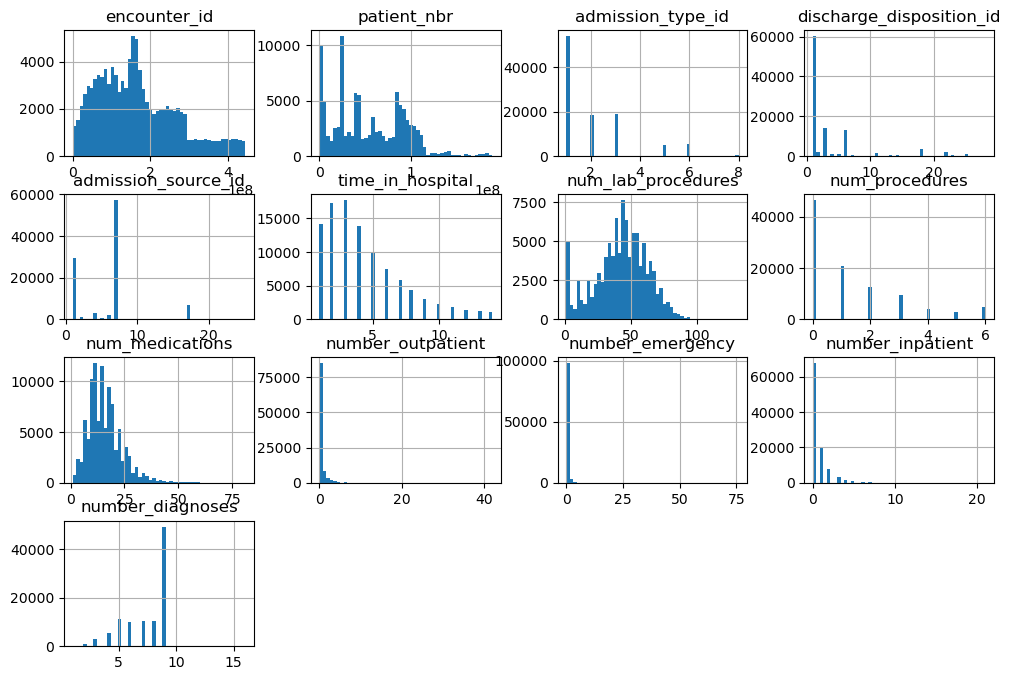

In [34]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

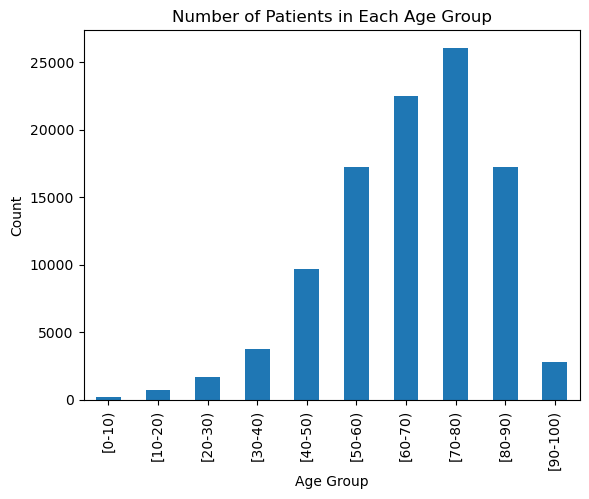

In [18]:

data['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Patients in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

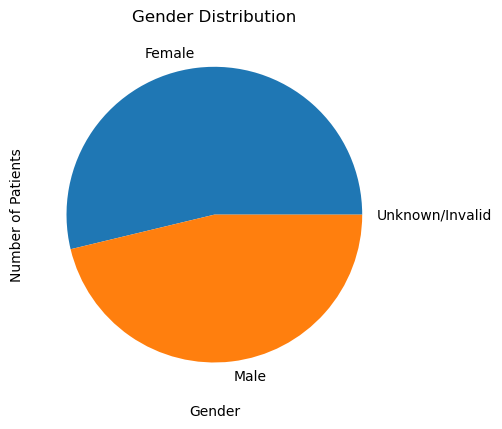

In [19]:
data['gender'].value_counts().plot(kind='pie', color='purple')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()


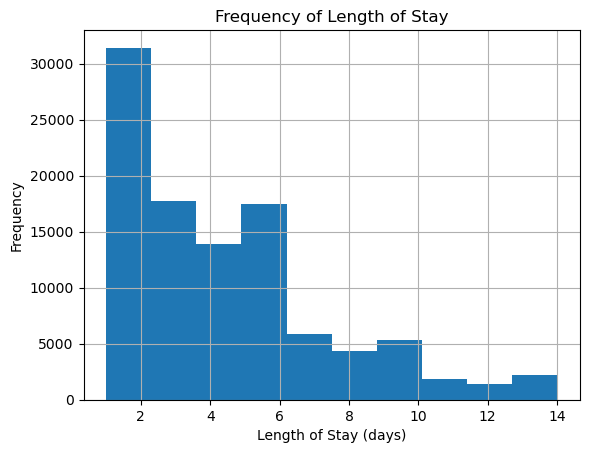

In [11]:
data['time_in_hospital'].hist(bins=10)
plt.title('Frequency of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


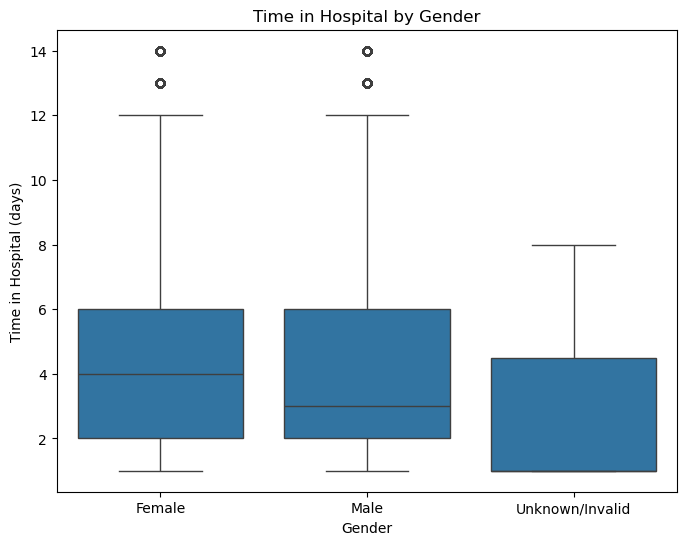

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='time_in_hospital', data=df)
plt.title('Time in Hospital by Gender')
plt.xlabel('Gender')
plt.ylabel('Time in Hospital (days)')
plt.show()

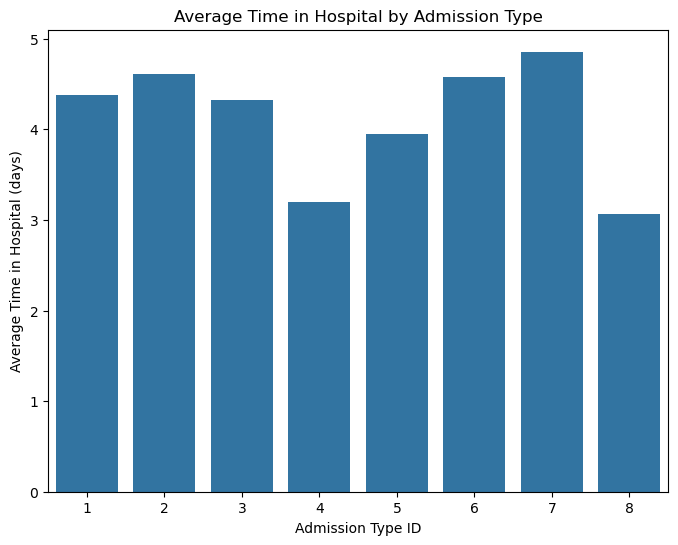

In [8]:
admission_avg = df.groupby('admission_type_id')['time_in_hospital'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='admission_type_id', y='time_in_hospital', data=admission_avg)
plt.title('Average Time in Hospital by Admission Type')
plt.xlabel('Admission Type ID')
plt.ylabel('Average Time in Hospital (days)')
plt.show()

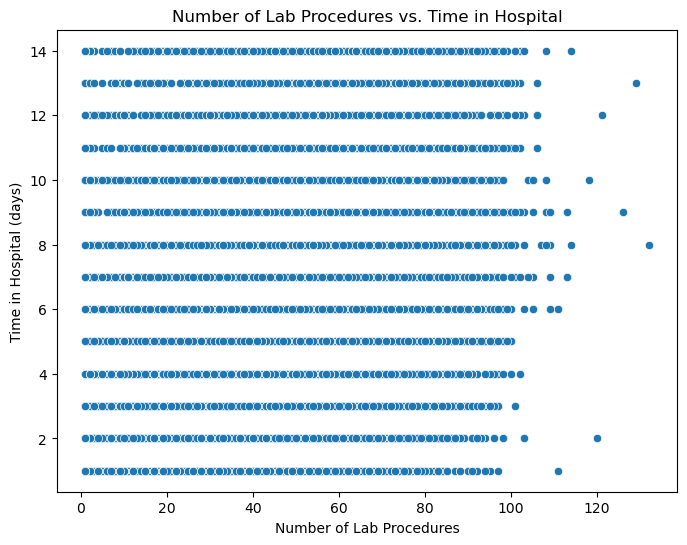

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_lab_procedures', y='time_in_hospital', data=df)
plt.title('Number of Lab Procedures vs. Time in Hospital')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Time in Hospital (days)')
plt.show()

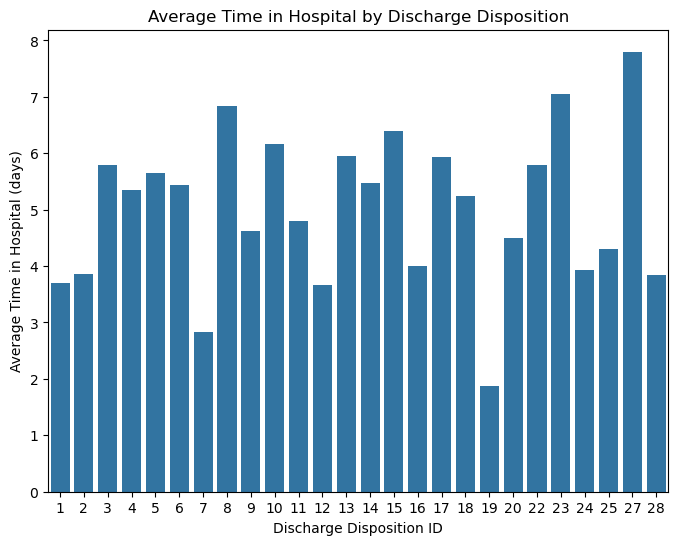

In [10]:
discharge_avg = df.groupby('discharge_disposition_id')['time_in_hospital'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='discharge_disposition_id', y='time_in_hospital', data=discharge_avg)
plt.title('Average Time in Hospital by Discharge Disposition')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Average Time in Hospital (days)')
plt.show()

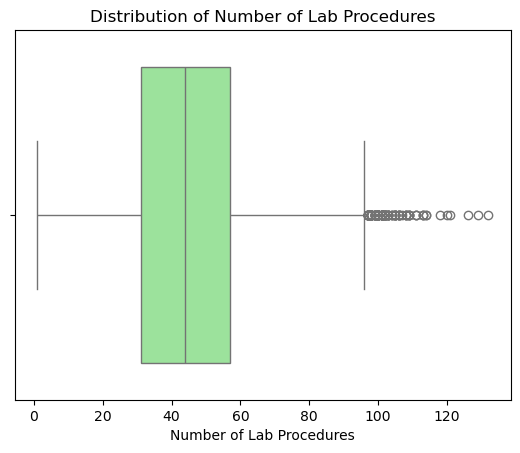

In [21]:

sns.boxplot(data=data, x='num_lab_procedures', color='lightgreen')
plt.title('Distribution of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.show()


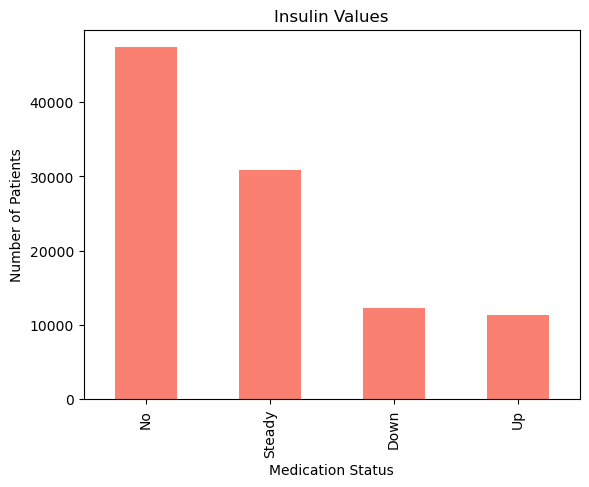

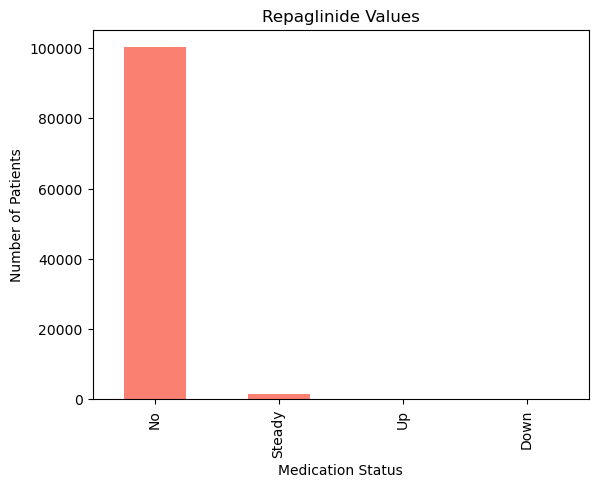

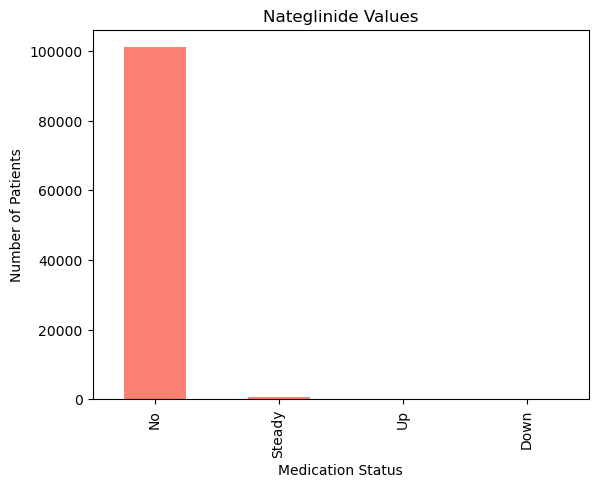

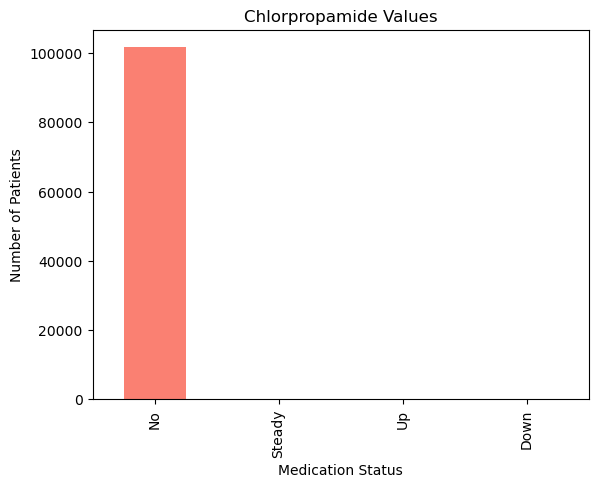

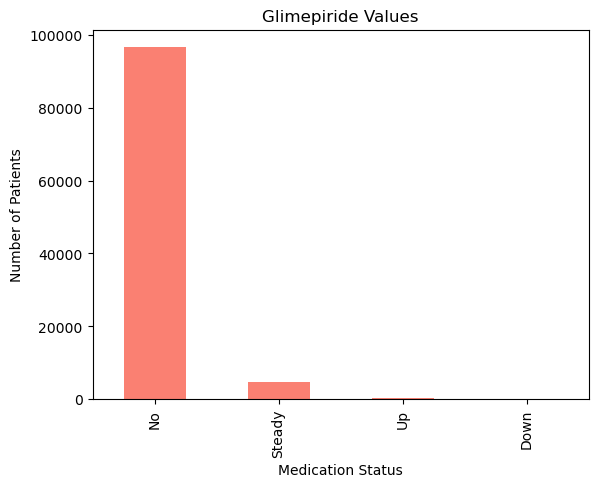

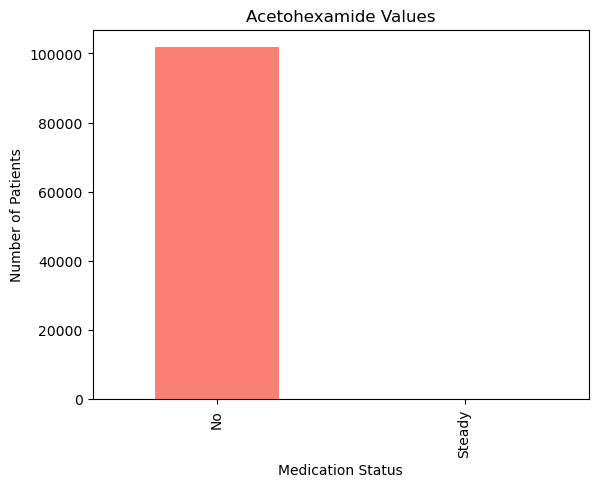

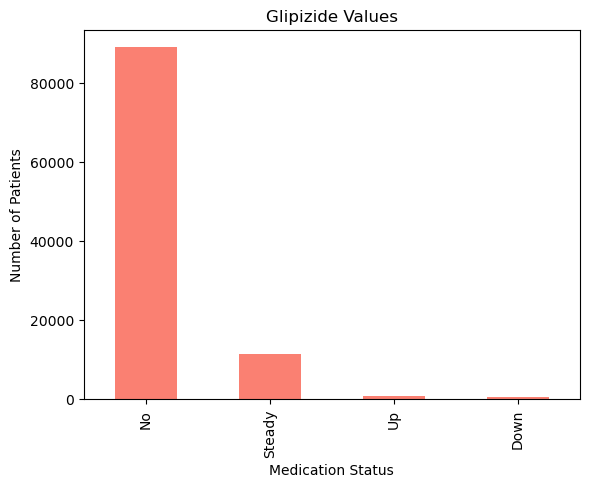

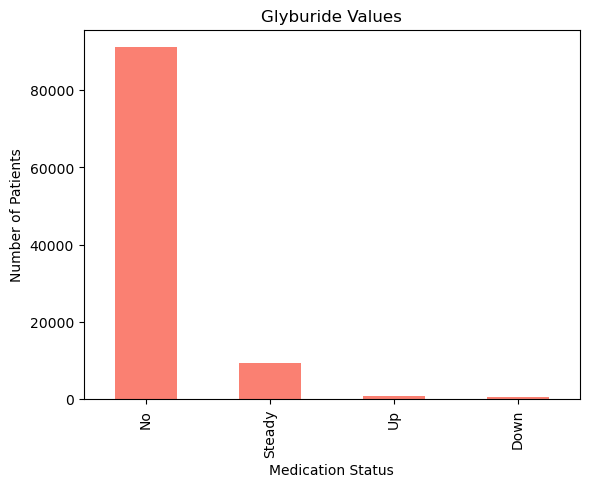

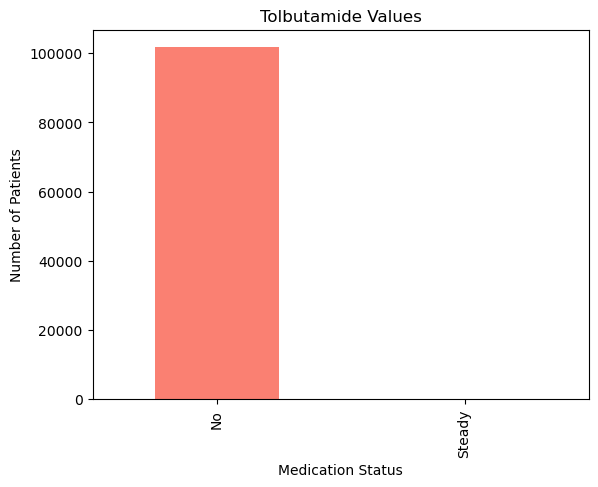

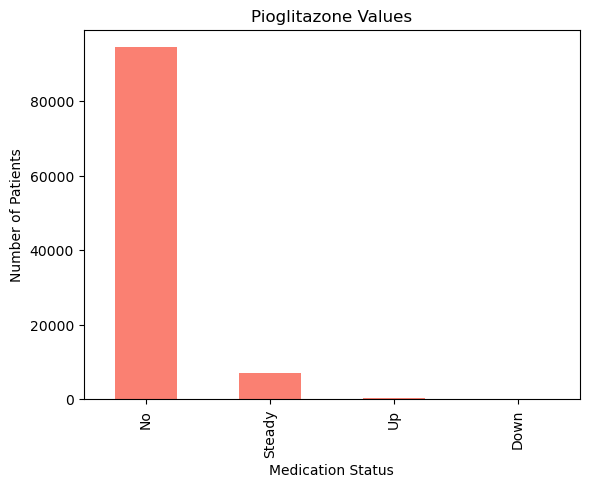

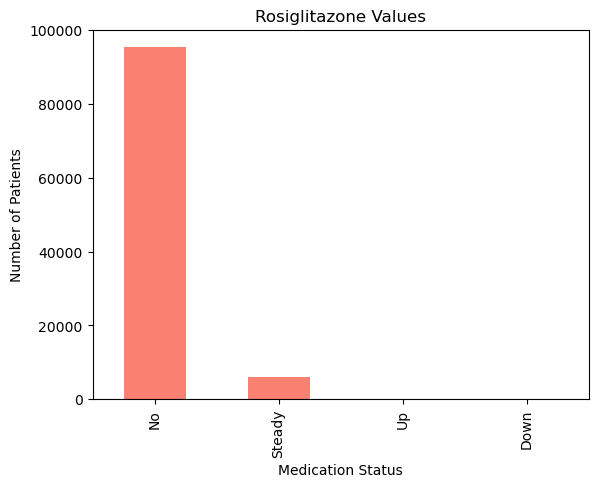

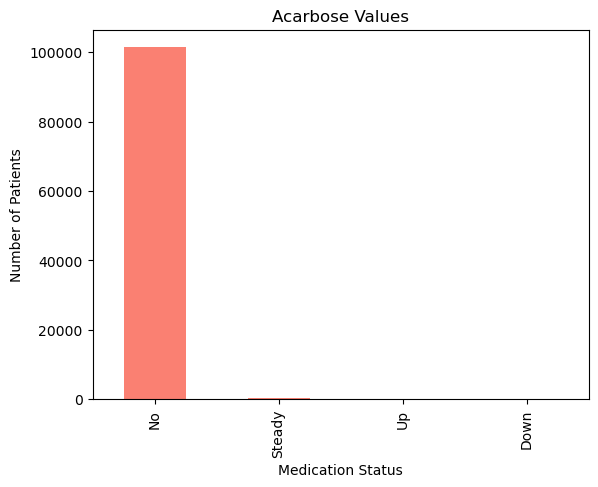

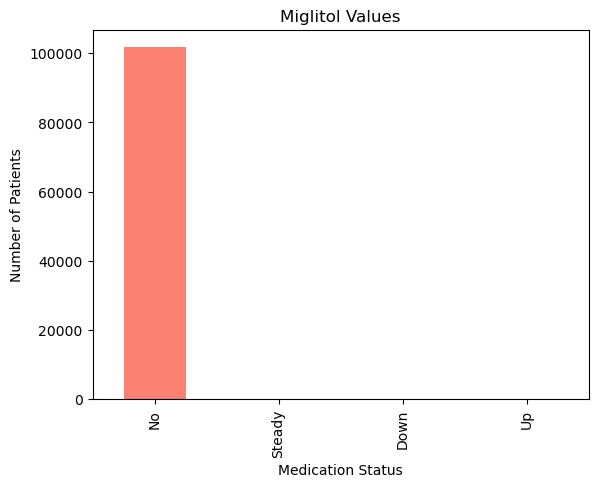

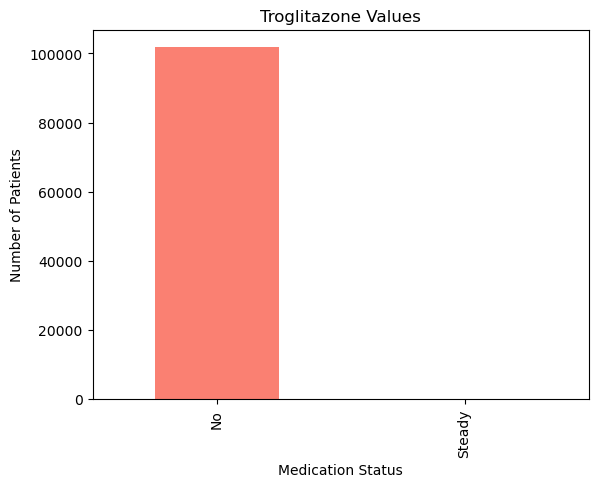

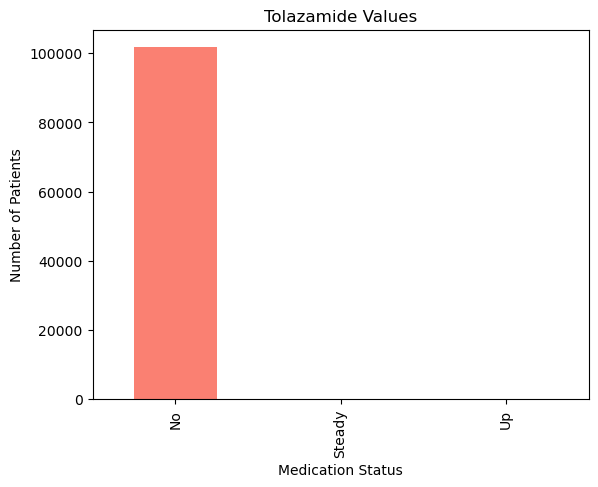

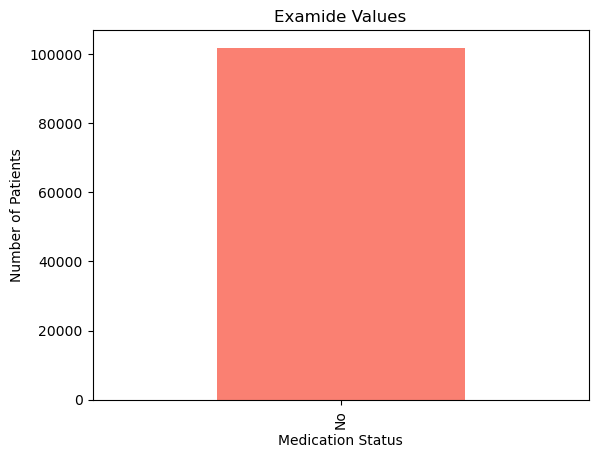

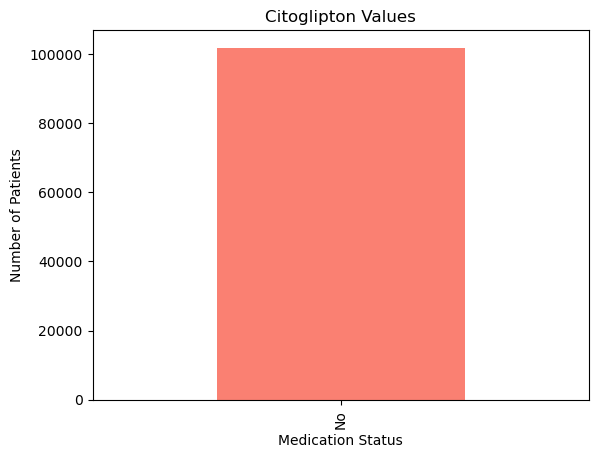

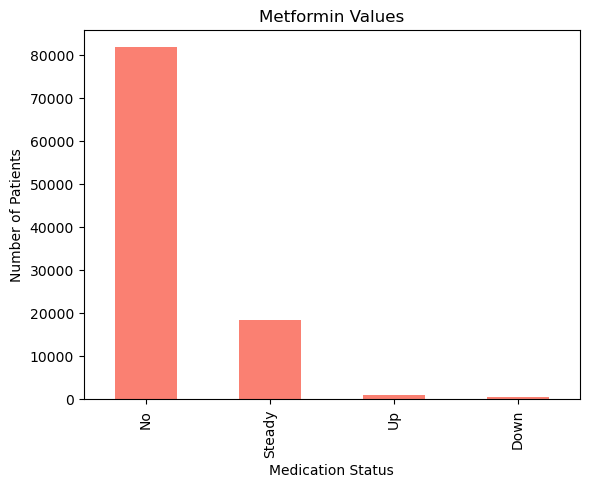

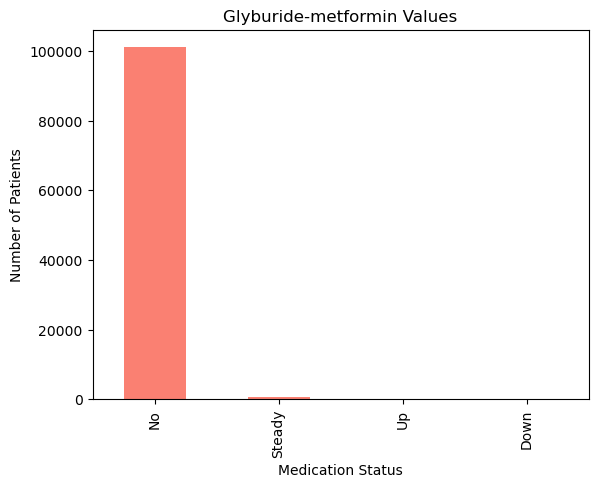

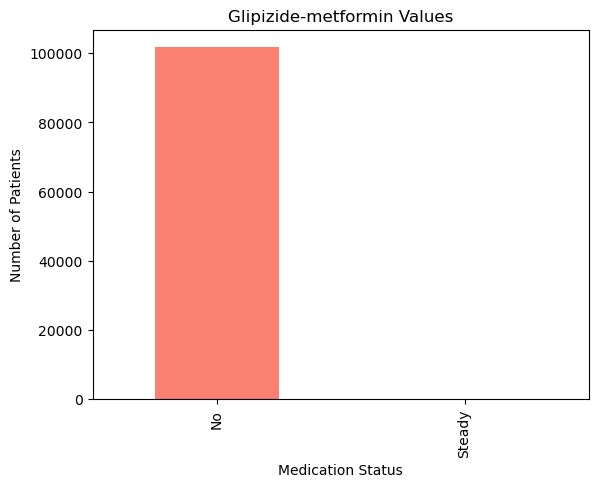

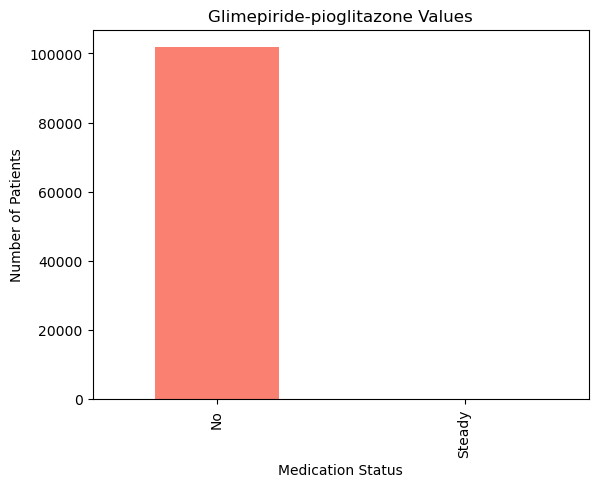

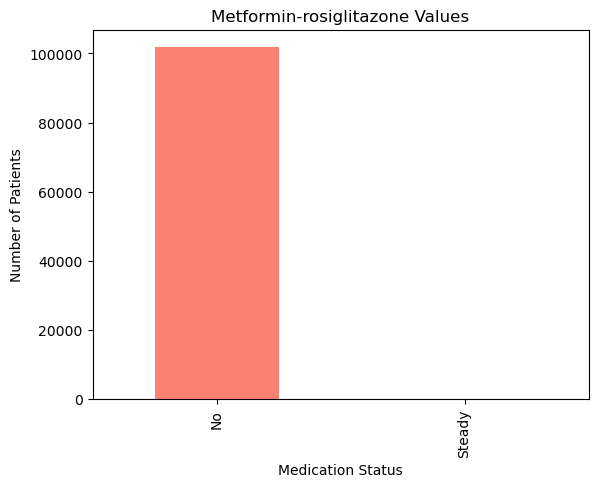

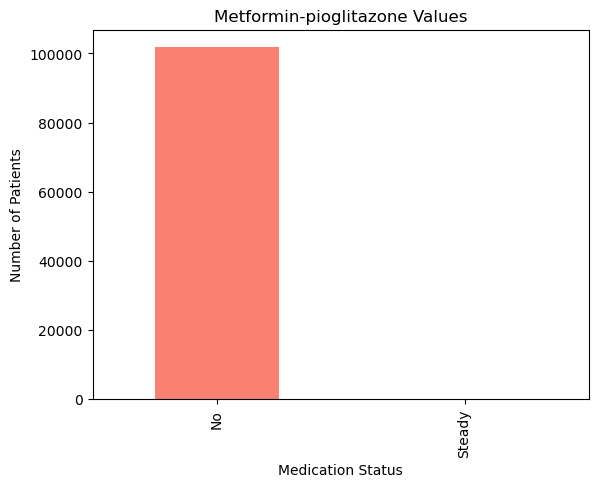

In [14]:
key_meds = ['insulin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
             'examide', 'citoglipton', 'metformin', 'glyburide-metformin', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
allowed_values = ['Down', 'No', 'Steady', 'Up'] 

for med in key_meds:
    filtered_counts = data[med][data[med].isin(allowed_values)].value_counts()
    filtered_counts.plot(kind='bar', title=f"{med.capitalize()} Values", color='salmon')
    plt.xlabel('Medication Status')
    plt.ylabel('Number of Patients')
    plt.show()


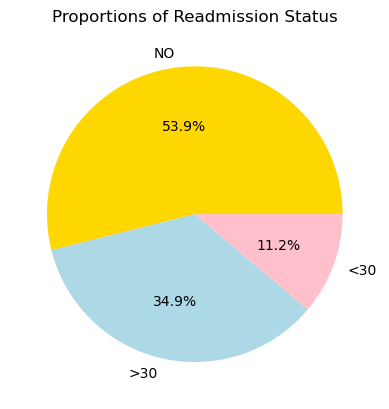

In [23]:
data['readmitted'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue', 'pink'])
plt.title('Proportions of Readmission Status')
plt.ylabel('')
plt.show()


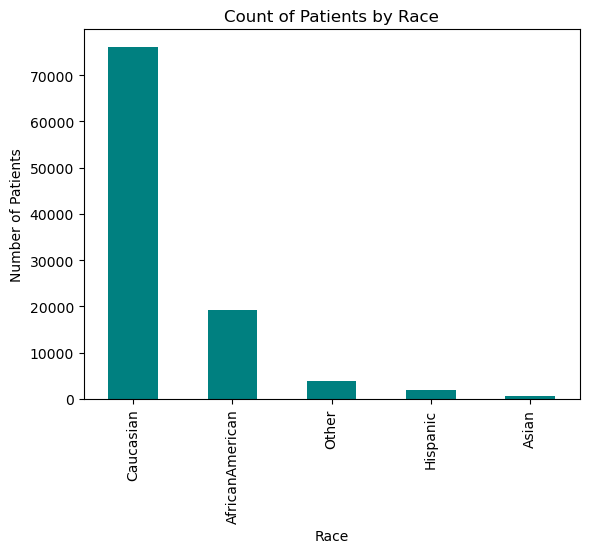

In [24]:
data['race'] = data['race'].replace('?', 'Other')
data['race'].value_counts().plot(kind='bar', color='teal')
plt.title('Count of Patients by Race')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.show()




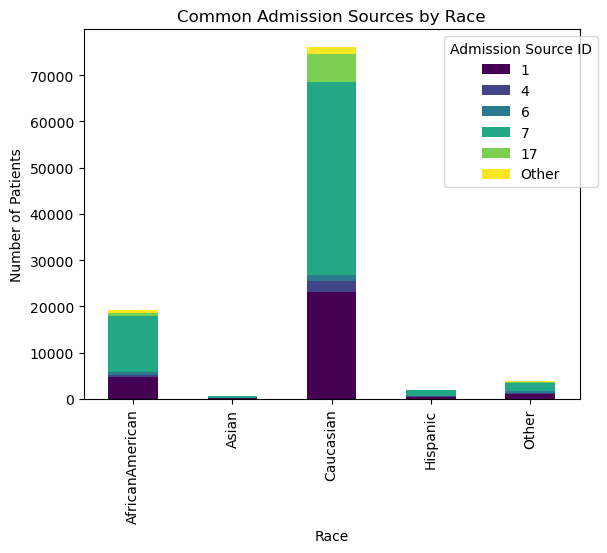

In [25]:
top_sources = data['admission_source_id'].value_counts().head(5).index  # Top 5 sources
data['admission_source_id'] = data['admission_source_id'].apply(
    lambda x: x if x in top_sources else 'Other')
admission_race = data.groupby(['race', 'admission_source_id']).size().unstack()
admission_race.plot(kind='bar', stacked=True, colormap='viridis')
plt.legend(title='Admission Source ID', bbox_to_anchor=(1.05, 1))
plt.title('Common Admission Sources by Race')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.show()


In [26]:
# Replace rare specialties with "Other"
top_specialties = data['medical_specialty'].value_counts().head(10).index  # Top 10 specialties
data['medical_specialty'] = data['medical_specialty'].apply(
    lambda x: x if x in top_specialties else 'Other'
)

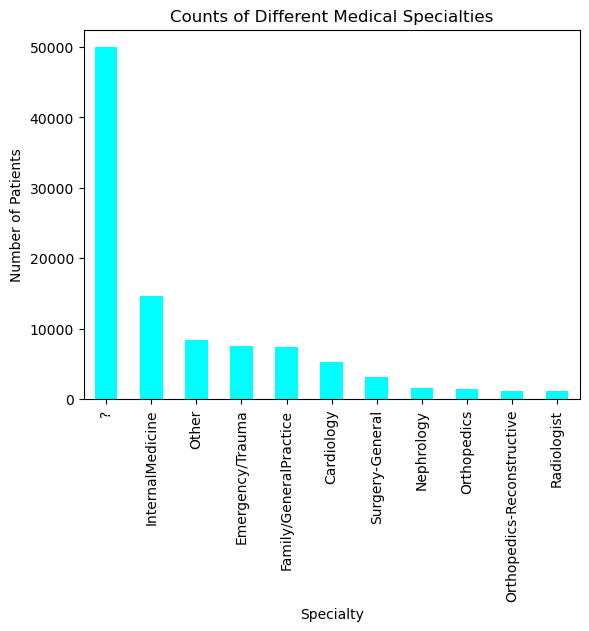

In [27]:

data['medical_specialty'].value_counts().plot(kind='bar', color='cyan')
plt.title('Counts of Different Medical Specialties')
plt.xlabel('Specialty')
plt.ylabel('Number of Patients')
plt.show()


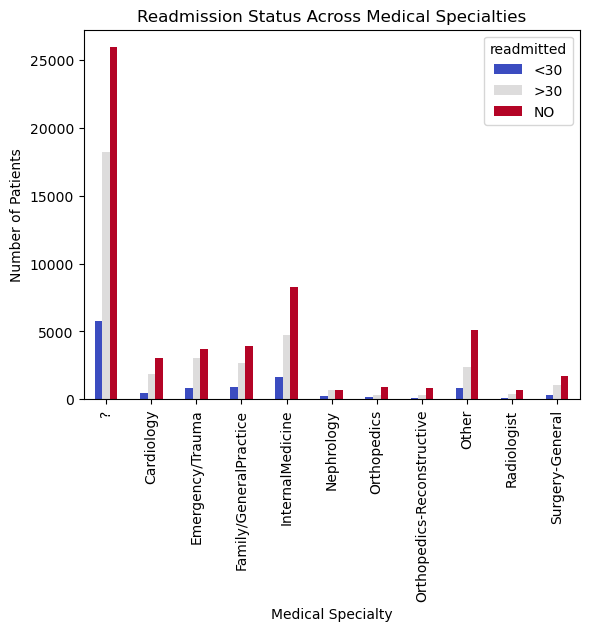

In [28]:

specialty_readmit = data.groupby(['medical_specialty', 'readmitted']).size().unstack()
specialty_readmit.plot(kind='bar', colormap='coolwarm')
plt.title('Readmission Status Across Medical Specialties')
plt.xlabel('Medical Specialty')
plt.ylabel('Number of Patients')
plt.show()


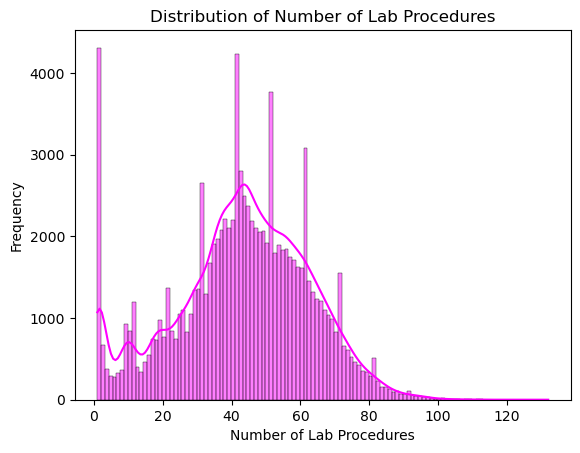

In [29]:
sns.histplot(data['num_lab_procedures'], kde=True, color='magenta')
plt.title('Distribution of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Frequency')
plt.show()


In [15]:
average_lab_procedures = df['num_lab_procedures'].sum() / len(df['num_lab_procedures'])
print(f"Average number of lab procedures: {average_lab_procedures}")


Average number of lab procedures: 43.09564098028811


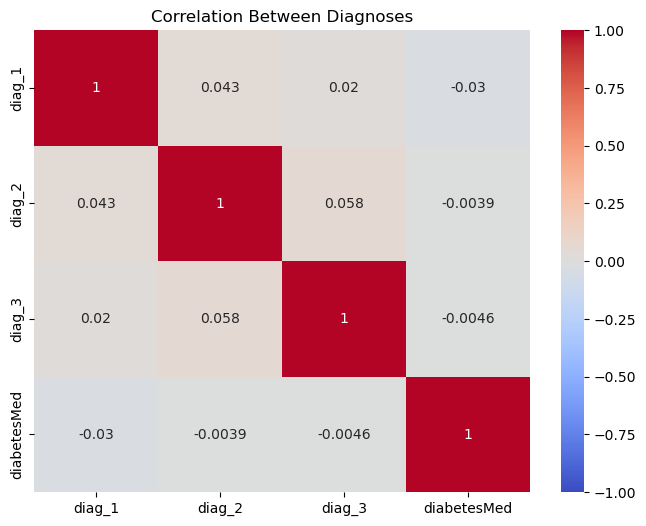

In [26]:
df_encoded = df[['diag_1', 'diag_2', 'diag_3', 'diabetesMed']].apply(lambda x: x.astype('category').cat.codes)

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Diagnoses')
plt.show()

/var/folders/5f/4ph3f2jj253bcxmy2h_4qdym0000gn/T/ipykernel_36064/1095067521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='readmitted', palette='pastel')


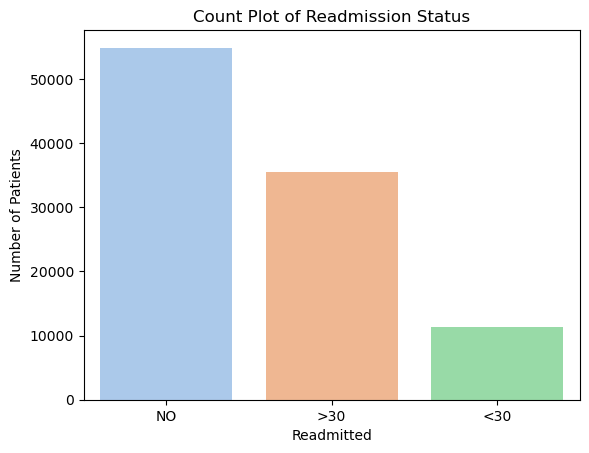

In [22]:
sns.countplot(data=data, x='readmitted', palette='pastel')
plt.title('Count Plot of Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Number of Patients')
plt.show()


1B.5 Identify Metadata from the Dataset

In [31]:

# Numerical summaries
print(data.describe())



       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  time_in_hospital  num_lab_procedures  \
count             101766.000000     101766.000000       101766.000000   
mean                   3.715642          4.395987           43.095641   
std                    5.280166          2.985108           19.674362   
min                    1.000000          1.000000            1.000000   
25%                    1.000000          2.000000           31.000000   
50%                    1.000000          4.000000        

1B.6 Splitting Data for Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [46]:
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [47]:
df.shape

(101766, 50)

In [49]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [50]:
len(train_set)

81412

In [51]:
len(test_set)

20354

_________
## *Task 2: Data Processing
### Task Description
Create a robust data preprocessing pipeline to handle missing values, encode categorical variables, and scale numerical features.

### **Task 2.1: Initial Cleaning and Pre-processing**

#### 2.1.1: Load and Visualise the Data
- Use pandas to load the dataset.
- Visualise the first few rows to understand the structure of the data.

In [3]:
# Importing required Python libraries
import pandas as pd
import numpy as np

# Loading the data

file_path = 'diabetic_data.csv'
df = pd.read_csv(file_path)

# visualise the first few rows of the data

df.head()

    

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

Retake 2.1.1: Load and Check for Incorrect Types

In [12]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [13]:
#these values are numeric but it is a object in the data
diag_cols = ['diag_1', 'diag_2', 'diag_3']
df[diag_cols] = df[diag_cols].apply(pd.to_numeric, errors='coerce')

In [14]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
weight                       object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              

In [2]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [3]:
df.tail()

encounter_id  patient_nbr             race  gender      age weight  \
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
101761                       No                      No      Ch         Yes   
101762                       No                      No      No         Yes   
101763                       No                      No      Ch         Yes   
101764                       No                      No      Ch         Yes   
101765                       No                      No      No          No   

       readmitted  
101761        >30  
101762         NO  
101763         NO  
101764         NO  
101765         NO  

[5 rows x 50 columns]

#### 2.1.2: Display Data Types and Check for Incorrect Types

- Use the .dtypes attribute to display each column's data type.
- Identify columns that have unexpected data types (e.g., numeric data stored as strings).

In [4]:
# Display data types of each column

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#### 2.1.3: Identify and Remove Duplicate Rows

- Check for duplicate rows.
- If duplicates exist, remove them 

In [3]:
# Check for duplicate rows
 #<add your code here>

print(f"Number of unique values in title column: ", df.nunique())

# Drop duplicates if any
df.drop_duplicates()


Number of unique values in title column:  encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamid

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

### Task 2.2: Handling Metadata and Missing Values
#### 2.2.1: Identify Metadata from the Dataset
Metadata includes information like column names, data types, and any additional descriptive information.

In [3]:
# Display metadata including column names and data types
df.value_counts()

encounter_id  patient_nbr  race             gender  age      weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
434900486     126428594    AfricanAmerican  Male    [40-50)  ?       6                  7                         7                    2                 ?           InternalMedicine   60                  0               4                0                  0            


#### 2.2.2: Analyse Different Types of Data
- Categorize columns based on their data types (e.g., numerical, categorical).
- Describe the significance of each data type and how it might impact data processing.

In [7]:
# Describe data to understand different types
df.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  di

#### 2.2.3: Identify Missing Values
- Missing values can significantly impact model performance and analysis.
- Count missing values in each column.
- Calculate the percentage of missing values.

In [4]:
df.replace('?', np.nan, inplace=True)

In [5]:
# Identify and calculate the percentage of missing values
 #<add your code here>
print("Missing values (in percentage) for each column:\n", df.isnull().mean() * 100)

Missing values (in percentage) for each column:
 encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
r

In [6]:
missing_percentage = df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print("Missing values (in percentage) for each column:\n", missing_percentage_sorted)

Missing values (in percentage) for each column:
 weight                      96.858479
max_glu_serum               94.746772
A1Cresult                   83.277322
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
patient_nbr                  0.000000
time_in_hospital             0.000000
admission_source_id          0.000000
num_lab_procedures           0.000000
encounter_id                 0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
gender                       0.000000
age                          0.000000
number_inpatient             0.000000
number_emergency             0.000000
number_outpatient            0.000000
num_medications              0.000000
num_procedures               0.000000
number_diagnoses             0.000000
metformin                    0.000000
r

In [7]:
df = df.drop(columns=['patient_nbr', 'encounter_id', 'weight', 'payer_code', 'max_glu_serum', 'A1Cresult', 'medical_specialty'])

In [12]:
!pip install category-encoders

In [8]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [9]:
# Mapping age ranges to midpoints
age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
    '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}

df['age'] = df['age'].replace(age_mapping).astype(int)
print(df['age'].dtype)  # Should now be int



int64


/var/folders/5f/4ph3f2jj253bcxmy2h_4qdym0000gn/T/ipykernel_11656/3148190289.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace(age_mapping).astype(int)


In [10]:
#these are already numeric but not seen like that in data set for some reason.
diag_cols = ['diag_1', 'diag_2', 'diag_3']
df[diag_cols] = df[diag_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
from sklearn.preprocessing import LabelEncoder
drug_cols = ['readmitted','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
             'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

le = LabelEncoder()
for col in drug_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [12]:
df['race'] = df['race'].replace('Other', 'Unknown')
print(df['race'].isnull().sum())

2273


In [13]:
df['race'] = df['race'].fillna('Unknown')

In [14]:
print(df['race'].isnull().sum())

0


In [15]:
df = pd.get_dummies(df, columns=['race'], drop_first=True)

In [16]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [17]:
df['change'] = df['change'].map({'Ch': 1, 'No': 0})

In [18]:
df['diabetesMed'] = df['diabetesMed'].map({'Yes': 1, 'No': 0})

In [19]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index([], dtype='object')


In [20]:
df = df.fillna(df.median())

In [21]:
df.to_csv('regression_diabetic_data.csv', index=False)

In [22]:
file_path = 'regression_diabetic_data.csv'
df = pd.read_csv(file_path)

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    101766 non-null  object 
 1   age                       101766 non-null  int64  
 2   admission_type_id         101766 non-null  int64  
 3   discharge_disposition_id  101766 non-null  int64  
 4   admission_source_id       101766 non-null  int64  
 5   time_in_hospital          101766 non-null  int64  
 6   num_lab_procedures        101766 non-null  int64  
 7   num_procedures            101766 non-null  int64  
 8   num_medications           101766 non-null  int64  
 9   number_outpatient         101766 non-null  int64  
 10  number_emergency          101766 non-null  int64  
 11  number_inpatient          101766 non-null  int64  
 12  diag_1                    100100 non-null  float64
 13  diag_2                    98872 non-null   f

In [23]:
df.shape

(101766, 46)

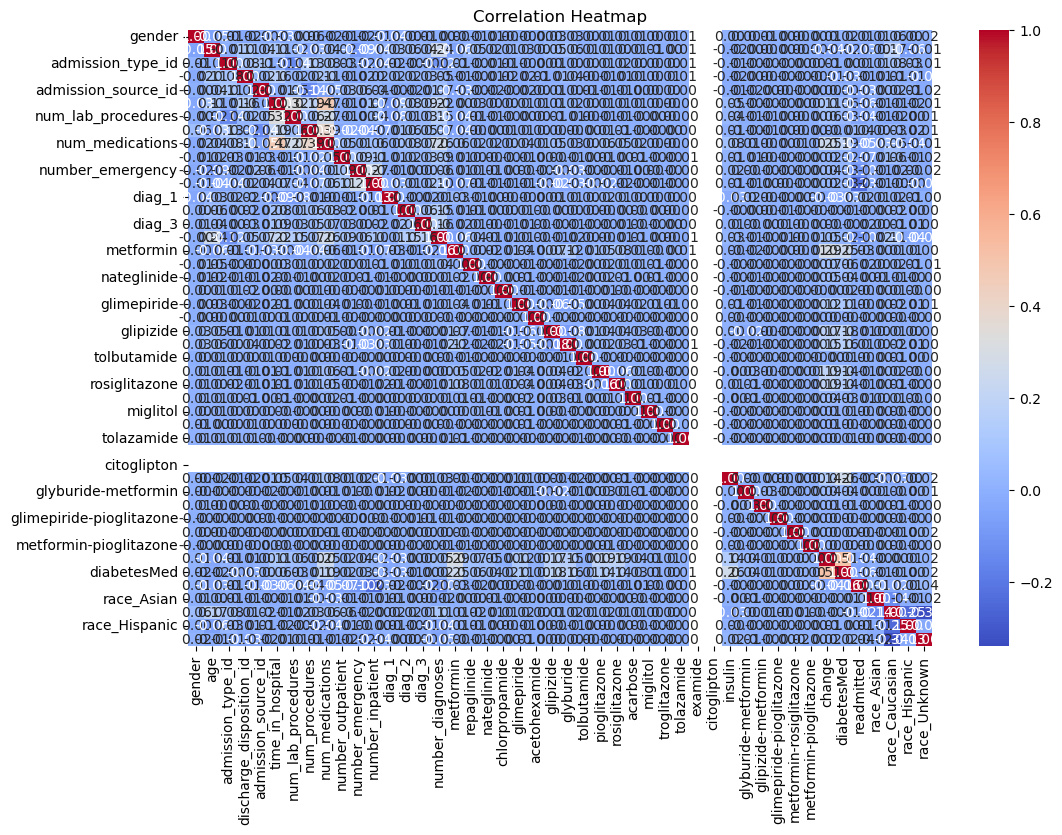

Top correlations with target variable:
time_in_hospital            1.000000
num_medications             0.466135
num_lab_procedures          0.318450
number_diagnoses            0.220186
num_procedures              0.191472
discharge_disposition_id    0.162748
change                      0.109173
age                         0.107515
diag_3                      0.086740
diag_2                      0.075503
number_inpatient            0.073623
diabetesMed                 0.062520
insulin                     0.045957
repaglinide                 0.030722
glyburide                   0.017898
glimepiride                 0.012094
glipizide                   0.011750
acetohexamide               0.010085
rosiglitazone               0.007046
pioglitazone                0.006753
acarbose                    0.005860
nateglinide                 0.004762
chlorpropamide              0.003952
troglitazone                0.003524
miglitol                    0.003502
tolbutamide                 0.003042

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()

# Step 2: Visualize Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Identify Top Correlations with the Target
target = 'time_in_hospital'  
correlations = corr_matrix[target].sort_values(ascending=False)
print("Top correlations with target variable:")
print(correlations)

#### 2.2.4: Splitting Data for Analysis
Splitting data ensures that models are trained on one portion of the data and tested on another, unseen portion.

In [13]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures'])
y = df['time_in_hospital']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (81412, 42)
Testing Features Shape: (20354, 42)
Training Target Shape: (81412,)
Testing Target Shape: (20354,)


___________
## *Task 3: Machine Learning
### Task Description
Implement various machine learning algorithms for regression, classification and clustering and evaluating them.

### **Task 3.1: Implementing Regression Baseline**
#### 3.1.1: Loading the data
- Use pandas to load the dataset.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'regression_diabetic_data.csv'
df = pd.read_csv(file_path)
df.head()

gender  age  admission_type_id  discharge_disposition_id  \
0     0.0    5                  6                        25   
1     0.0   15                  1                         1   
2     0.0   25                  1                         1   
3     1.0   35                  1                         1   
4     1.0   45                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  number_outpatient  ...  glimepiride-pioglitazone  \
0                1                  0  ...                         0   
1               18                  0  ...                         0   
2               13                  2  ...                         0   
3               16                  0  ...                         0   
4                8                  0  ...                         0   

   metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
0                        0                       0       0            0   
1                        0                       0       1            1   
2                        0                       0       0            1   
3                        0                       0       1            1   
4                        0                       0       1            1   

   readmitted  race_Asian  race_Caucasian  race_Hispanic  race_Unknown  
0           2       False            True          False         False  
1           1       False            True          False         False  
2           2       False           False          False         False  
3           2       False            True          False         False  
4           2       False            True          False         False  

[5 rows x 46 columns]

In [19]:
df.tail()

gender  age  admission_type_id  discharge_disposition_id  \
101761    Male   75                  1                         3   
101762  Female   85                  1                         4   
101763    Male   75                  1                         1   
101764  Female   85                  2                         3   
101765    Male   75                  1                         1   

        admission_source_id  time_in_hospital  num_lab_procedures  \
101761                    7                 3                  51   
101762                    5                 5                  33   
101763                    7                 1                  53   
101764                    7                10                  45   
101765                    7                 6                  13   

        num_procedures  num_medications  number_outpatient  ...  \
101761               0               16                  0  ...   
101762               3               18                  0  ...   
101763               0                9                  1  ...   
101764               2               21                  0  ...   
101765               3                3                  0  ...   

        glimepiride-pioglitazone  metformin-rosiglitazone  \
101761                         0                        0   
101762                         0                        0   
101763                         0                        0   
101764                         0                        0   
101765                         0                        0   

        metformin-pioglitazone  change  diabetesMed  readmitted  race_Asian  \
101761                       0      Ch          Yes           1       False   
101762                       0      No          Yes           2       False   
101763                       0      Ch          Yes           2       False   
101764                       0      Ch          Yes           2       False   
101765                       0      No           No           2       False   

        race_Caucasian  race_Hispanic  race_Unknown  
101761           False          False         False  
101762           False          False         False  
101763            True          False         False  
101764            True          False         False  
101765            True          False         False  

[5 rows x 46 columns]

#### 3.1.2: Start to implement Linear Regression as a baseline model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Target Value drop to avoid bias in data
X = df.drop(columns=(['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures']))
y = df['time_in_hospital']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling (Standardization) could also use mid max scaling but range would be difficult in this data set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Linear Regression model 
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = linear_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Linear Regression Model Performance:
Mean Absolute Error (MAE): 2.074433357194141e-15
Mean Squared Error (MSE): 9.991945292197043e-30


##### You could try other linear models as well, such as Ridge, Lasso, useful information can be found [here](https://scikit-learn.org/stable/modules/linear_model.html#linear-model).

#### 3.1.3: Visualise the output for linear regression

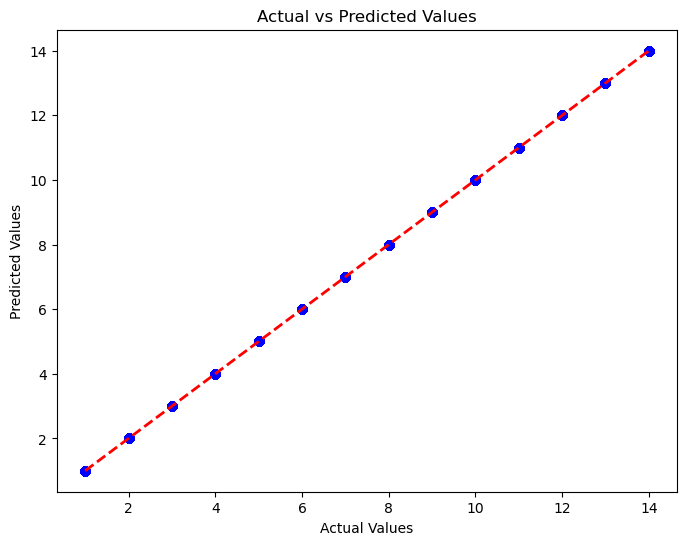

In [26]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()



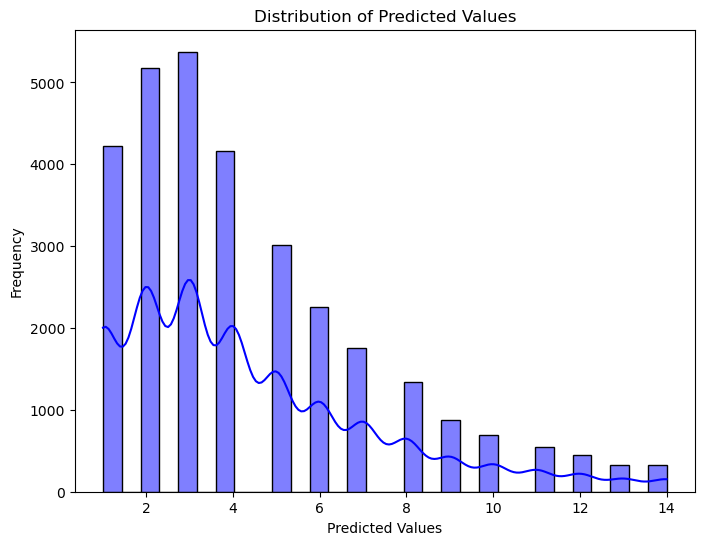

In [29]:
# Plot distribution of predicted values
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='blue', bins=30)
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()



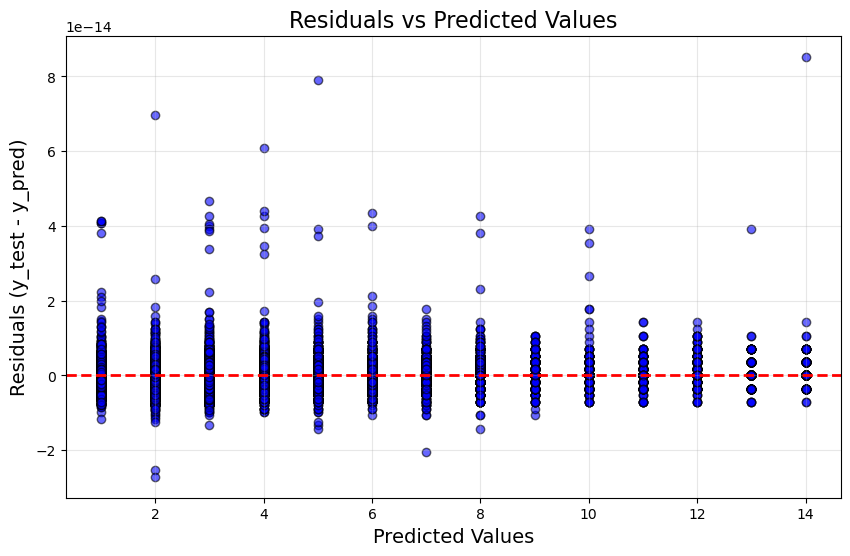

In [27]:

residuals = y_test - y_pred


plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals (y_test - y_pred)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()``


                    num_medications  num_lab_procedures  number_diagnoses  \
num_medications            1.000000            0.268161          0.261526   
num_lab_procedures         0.268161            1.000000          0.152773   
number_diagnoses           0.261526            0.152773          1.000000   
num_procedures             0.385767            0.058066          0.073734   

                    num_procedures  
num_medications           0.385767  
num_lab_procedures        0.058066  
number_diagnoses          0.073734  
num_procedures            1.000000  


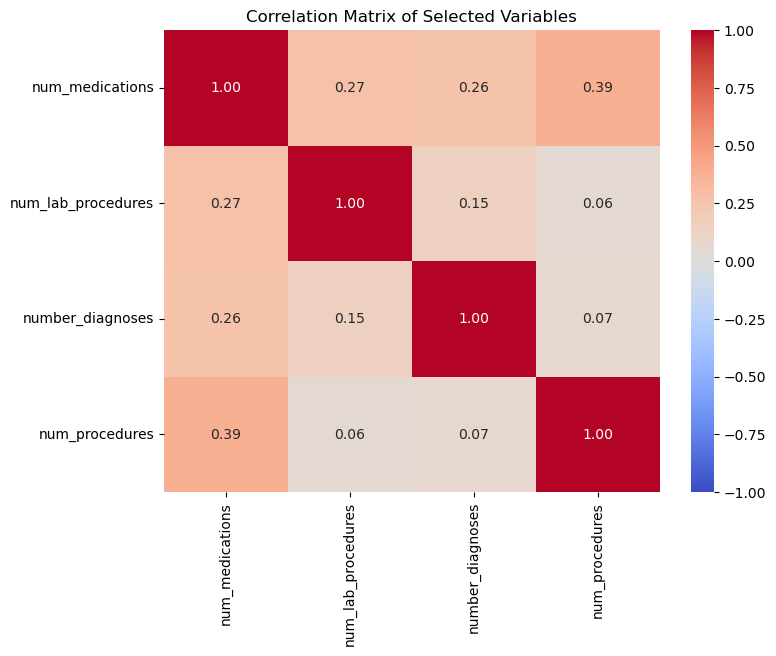

In [32]:
columns_of_interest = ['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures']
df_selected = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Selected Variables')
plt.show()

Linear Regression Model Performance:
Cross-Validation MAE (Average): 4.752508244064836e-15
Mean Absolute Error (MAE): 3.290973055084745e-15
Mean Squared Error (MSE): 2.1488578809883366e-29


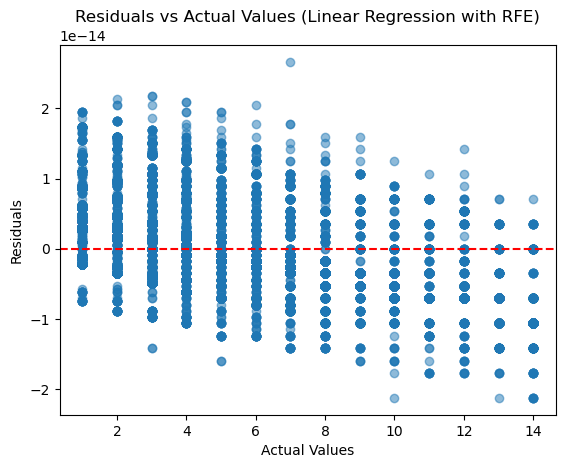

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Target Value drop to avoid bias in data
X = df.drop(columns=(['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures']))
y = df['time_in_hospital']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)  # Select top 5 features
X_train_reduced = rfe.fit_transform(X_train_scaled, y_train)
X_test_reduced = rfe.transform(X_test_scaled)

# Linear Regression Model
linear_model = LinearRegression()
cross_val_scores = cross_val_score(linear_model, X_train_reduced, y_train, cv=5, scoring='neg_mean_absolute_error')
linear_model.fit(X_train_reduced, y_train)

# Model Evaluation
y_pred = linear_model.predict(X_test_reduced)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Cross-Validation MAE (Average): {-cross_val_scores.mean()}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Residuals vs Actuals Plot
residuals = y_test - y_pred

plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Values (Linear Regression with RFE)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


#### 3.1.4: Implement Decision Tree Regression for Non-linear Relationships

In [50]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)

# Evaluate
y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print(f"Decision Tree Regression MAE: {mae_tree}")
print(f"Decision Tree Regression MSE: {mse_tree}")


Decision Tree Regression MAE: 0.2603717937073479
Decision Tree Regression MSE: 0.14136539294302533


#### 3.1.5: Implement Gradient Boosting Regression

In [43]:
# Importing required sklearn packages for implementing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor


# Initialize and train the Gradient Boosting Regressor
gboost_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gboost_model.fit(X_train, y_train)

# Predictions
y_pred_gboost = gboost_model.predict(X_test)

# Evaluation
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)

# Print the evaluation results
print(f"Gradient Boosting Regression MAE: {mae_gboost}")
print(f"Gradient Boosting Regression MSE: {mse_gboost}")


Gradient Boosting Regression MAE: 8.161398360502816e-05
Gradient Boosting Regression MSE: 1.069554365821906e-08


#### 3.1.6: Implement XGBoost Regression

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Importing required packages
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have X_b (features) and y (target) already preprocessed

# Initialize and train XGBoost Regressor
xgboost_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predictions
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluation
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

# Print the evaluation results
print(f"XGBoost Regression MAE: {mae_xgboost}")
print(f"XGBoost Regression MSE: {mse_xgboost}")


XGBoost Regression MAE: 8.19871054776141e-05
XGBoost Regression MSE: 1.0842330704537364e-08


#### 3.1.7: Visualise the output for non-linear regression
Try to plot histogram of features, useful information can be found [here](https://matplotlib.org/stable/gallery/statistics/hist.html)

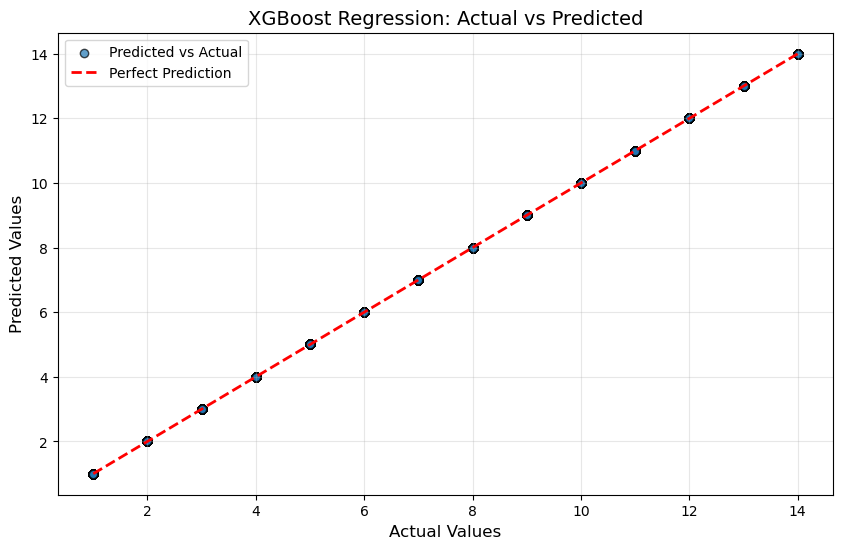

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test (true values) and y_pred_xgboost (predicted values) are available
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_xgboost, alpha=0.7, edgecolor='k', label='Predicted vs Actual')

# Line representing perfect prediction
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Labels and title
plt.title('XGBoost Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

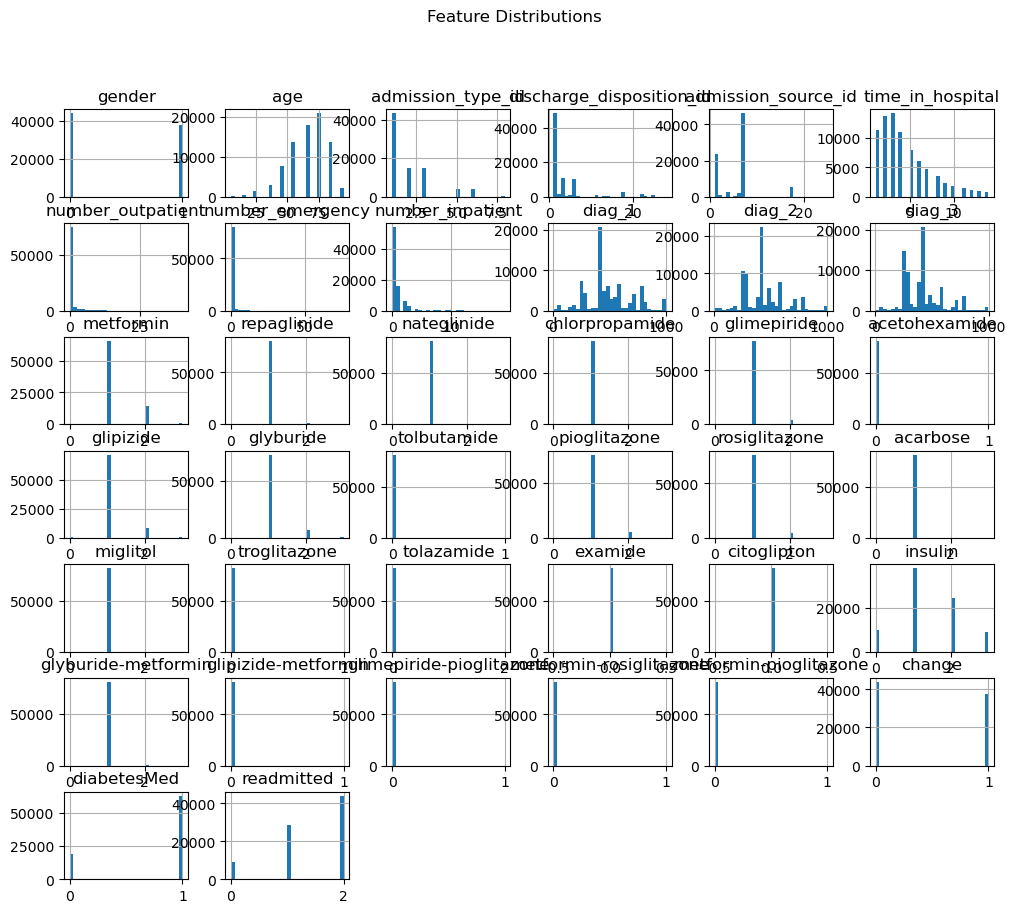

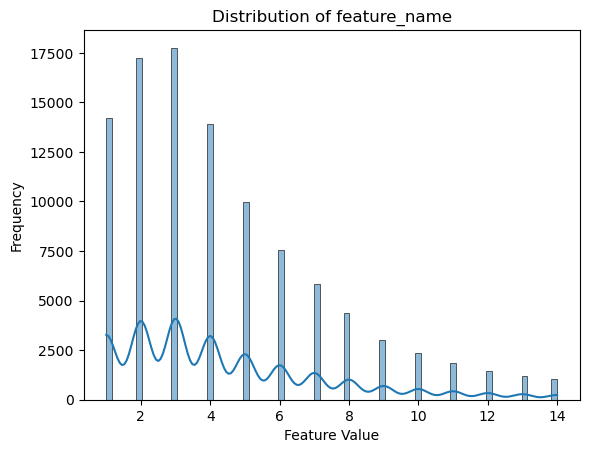

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all features
X_train.hist(bins=30, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Or use seaborn for individual feature
sns.histplot(X['time_in_hospital'], kde=True)
plt.title('Distribution of feature_name')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

#### 3.1.8: Evaluation and Model Comparison
compare the performance of all four models: Linear Regression, Decision Tree Regression, Gradient Boosting, and XGBoost. Summarise each model’s performance using a comparison table.


In [52]:
# Sample comparison table
results = {
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting", "XGBoost"],
    "MAE": [mae, mae_tree, mae_gboost, mae_xgboost],
    "MSE": [mse, mse_tree, mae_gboost, mse_xgboost]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model           MAE           MSE
0  Linear Regression  1.082256e-14  2.075341e-28
1      Decision Tree  2.603718e-01  1.413654e-01
2  Gradient Boosting  8.161398e-05  8.161398e-05
3            XGBoost  8.198711e-05  1.084233e-08


#### Expected Output for model comparison in 3.1.8:

| Model | MAE | MSE |
|---|---|---|
| Linear Regression | -- | -- |
| Decision Tree     | -- | -- |
| Gradient Boosting | -- | -- |
| XGBoost           | -- | -- |

++++++++
### **3.2: Implementing Classification Baseline**


#### 3.2.1: Loading the data
- Use pandas to load the dataset.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('regression_diabetic_data.csv')

df.head()

gender  age  admission_type_id  discharge_disposition_id  \
0     0.0    5                  6                        25   
1     0.0   15                  1                         1   
2     0.0   25                  1                         1   
3     1.0   35                  1                         1   
4     1.0   45                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  number_outpatient  ...  glimepiride-pioglitazone  \
0                1                  0  ...                         0   
1               18                  0  ...                         0   
2               13                  2  ...                         0   
3               16                  0  ...                         0   
4                8                  0  ...                         0   

   metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
0                        0                       0       0            0   
1                        0                       0       1            1   
2                        0                       0       0            1   
3                        0                       0       1            1   
4                        0                       0       1            1   

   readmitted  race_Asian  race_Caucasian  race_Hispanic  race_Unknown  
0           2       False            True          False         False  
1           1       False            True          False         False  
2           2       False           False          False         False  
3           2       False            True          False         False  
4           2       False            True          False         False  

[5 rows x 46 columns]

#### 3.2.2:  Prepare Data for Classification


These visualizations are all created using chat gpt

I got carried away doing the linear regression ipynb notebook. When I used this model and applied decision tree, gradient, and xb boost the scores were very simiilar. While these scores are higher than my model before, I spent way less time creatign the model as the cleaning was much simpler. I also did it on my own following the notebook not using chat gpt to do the whole thing
I will now continue with 3.2.2

In [27]:
import pandas as pd


df.head()


gender  age  admission_type_id  discharge_disposition_id  \
0     0.0    5                  6                        25   
1     0.0   15                  1                         1   
2     0.0   25                  1                         1   
3     1.0   35                  1                         1   
4     1.0   45                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  number_outpatient  ...  metformin-rosiglitazone  \
0                1                  0  ...                        0   
1               18                  0  ...                        0   
2               13                  2  ...                        0   
3               16                  0  ...                        0   
4                8                  0  ...                        0   

   metformin-pioglitazone  change  diabetesMed  readmitted  race_Asian  \
0                       0       0            0           2       False   
1                       0       1            1           1       False   
2                       0       0            1           2       False   
3                       0       1            1           2       False   
4                       0       1            1           2       False   

   race_Caucasian  race_Hispanic  race_Unknown  hospital_stay_category  
0            True          False         False              Short Stay  
1            True          False         False             Medium Stay  
2           False          False         False             Medium Stay  
3            True          False         False             Medium Stay  
4            True          False         False              Short Stay  

[5 rows x 47 columns]

In [47]:
df.tail()

gender  age  admission_type_id  discharge_disposition_id  \
101761     1.0   75                  1                         3   
101762     0.0   85                  1                         4   
101763     1.0   75                  1                         1   
101764     0.0   85                  2                         3   
101765     1.0   75                  1                         1   

        admission_source_id  time_in_hospital  num_lab_procedures  \
101761                    7                 3                  51   
101762                    5                 5                  33   
101763                    7                 1                  53   
101764                    7                10                  45   
101765                    7                 6                  13   

        num_procedures  num_medications  number_outpatient  ...  \
101761               0               16                  0  ...   
101762               3               18                  0  ...   
101763               0                9                  1  ...   
101764               2               21                  0  ...   
101765               3                3                  0  ...   

        glimepiride-pioglitazone  metformin-rosiglitazone  \
101761                         0                        0   
101762                         0                        0   
101763                         0                        0   
101764                         0                        0   
101765                         0                        0   

        metformin-pioglitazone  change  diabetesMed  readmitted  race_Asian  \
101761                       0       1            1           1       False   
101762                       0       0            1           2       False   
101763                       0       1            1           2       False   
101764                       0       1            1           2       False   
101765                       0       0            0           2       False   

        race_Caucasian  race_Hispanic  race_Unknown  
101761           False          False         False  
101762           False          False         False  
101763            True          False         False  
101764            True          False         False  
101765            True          False         False  

[5 rows x 46 columns]

In [67]:
# Importing required sklearn packages
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
df['readmitted'] = label_encoder.fit_transform(df['readmitted'])

# Defining target and features
X = df[['num_lab_procedures', 'diag_1', 'diag_2', 'diag_3']] 
y = df['readmitted']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (81412, 4)
X_test shape: (20354, 4)
y_train shape: (81412,)
y_test shape: (20354,)


#### 3.2.3:  Implement Logistic Regression as a Baseline Model

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initializing and training Logistic Regression model
LR = LogisticRegression(max_iter=1000, class_weight='balanced')  # Set max_iter to avoid convergence issues
LR.fit(X_train, y_train)

# Predictions
y_predict = LR.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro') 
precision = precision_score(y_test, y_predict, average='macro')  
recall = recall_score(y_test, y_predict, average='macro') 

# Printing the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Classification Report:\n", classification_report(y_test, y_predict))



Accuracy:  0.3573253414562248
Precision:  0.35293138377041916
Recall:  0.35735056129035697
F1 Score:  0.3025708039226216
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.46      0.19      2285
           1       0.37      0.13      0.19      7117
           2       0.57      0.48      0.52     10952

    accuracy                           0.36     20354
   macro avg       0.35      0.36      0.30     20354
weighted avg       0.45      0.36      0.37     20354



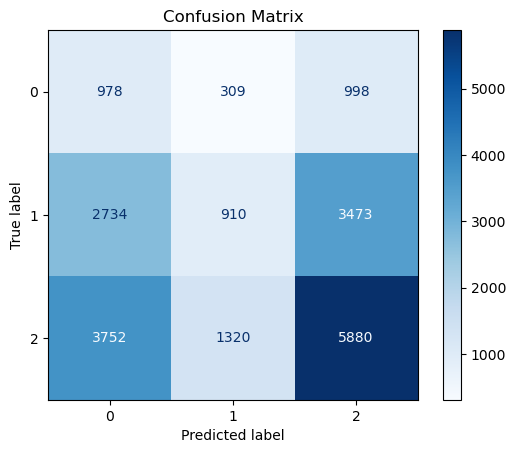

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(
    LR, X_test, y_test, display_labels=label_encoder.classes_, cmap='Blues', normalize=None
)
plt.title("Confusion Matrix")
plt.show()


In [55]:
print(df['readmitted'].value_counts())


readmitted
2    54864
1    35545
0    11357
Name: count, dtype: int64


In [64]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Evaluate with 5-fold cross-validation
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='f1_macro')  # Use F1 for imbalanced data
print(f"Logistic Regression Cross-Validation F1 Score: {cv_scores.mean():.2f}")


Logistic Regression Cross-Validation F1 Score: 0.29


#### 3.2.4: Implement Random Forest Classifier as a Non-linear Baseline

In [72]:
# Importing required sklearn packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Initializing and training Random Forest Classifier
forest_clf = RandomForestClassifier(
    n_estimators=200, max_depth=20, random_state=42, class_weight='balanced'
)
forest_clf.fit(X_train, y_train)


# Predictions
predForest = forest_clf.predict(X_test)

# Previewing Predictions vs True Values
print("Predicted values (first 3):", predForest[:3])
print("True values (first 3):", y_test[:3].values)

# Evaluation
accuracy_rf = accuracy_score(y_test, predForest)
f1_rf = f1_score(y_test, predForest, average='macro')  # Use 'macro' for multiclass
precision_rf = precision_score(y_test, predForest, average='macro')
recall_rf = recall_score(y_test, predForest, average='macro')

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("\nClassification Report:\n", classification_report(y_test, predForest))

# Example code for encoding categorical variables if needed
# from sklearn.preprocessing import LabelEncoder
# le_sex = LabelEncoder()
# le_sex.fit(['F', 'M'])
# df['sex_encoded'] = le_sex.transform(df['sex'])


Predicted values (first 3): [2 2 2]
True values (first 3): [2 2 2]
Random Forest Metrics:
Accuracy: 0.49
Precision: 0.37
Recall: 0.37
F1 Score: 0.37

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.08      0.11      2285
           1       0.39      0.37      0.38      7117
           2       0.57      0.65      0.61     10952

    accuracy                           0.49     20354
   macro avg       0.37      0.37      0.37     20354
weighted avg       0.46      0.49      0.47     20354



#### 3.2.5: Implement K-Nearest Neighbors (KNN) Classifier

In [73]:
# Importing required sklearn packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardizing the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the KNN model
X_train_reduced = X_train_scaled[:, :5]  # Use only the first 5 features
X_test_reduced = X_test_scaled[:, :5]

neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
neigh.fit(X_train_reduced, y_train)
yhat = neigh.predict(X_test_reduced)


# Predictions
yhat6 = neigh6.predict(X_test_scaled)

# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, yhat6)
f1_knn = f1_score(y_test, yhat6, average='macro')  # Use 'macro' for multiclass
precision_knn = precision_score(y_test, yhat6, average='macro')
recall_knn = recall_score(y_test, yhat6, average='macro')

# Printing results
print("KNN Model Performance:")
print(f"Train set Accuracy: {accuracy_score(y_train, neigh6.predict(X_train_scaled)):.2f}")
print(f"Test set Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print("\nClassification Report:\n", classification_report(y_test, yhat6))


KNN Model Performance:
Train set Accuracy: 0.66
Test set Accuracy: 0.45
Precision: 0.36
Recall: 0.35
F1 Score: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.08      0.10      2285
           1       0.37      0.45      0.41      7117
           2       0.56      0.52      0.54     10952

    accuracy                           0.45     20354
   macro avg       0.36      0.35      0.35     20354
weighted avg       0.44      0.45      0.44     20354



#### 3.2.6: Evaluation and Model Comparison
Compare the performance of implemented models using four metrics including "Accuracy", "Precision", "Recall", and "F1-score".

In [63]:
#page 113
results = {
    "Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbors"],
    "Accuracy": [accuracy, accuracy_rf, accuracy_knn],
    "Precision": [precision, precision_rf, precision_knn],
    "Recall": [recall, recall_rf, recall_knn],
    "f1 Score": [f1, f1_rf, f1_knn]
}

results_df = pd.DataFrame(results)
display(results_df)

Model  Accuracy  Precision    Recall  f1 Score
0  Logistic Regression  0.357325   0.352931  0.357351  0.302571
1        Random Forest  0.500295   0.377942  0.363918  0.357627
2  K-Nearest Neighbors  0.448806   0.355312  0.351966  0.349027

#### Expected Output for Model Comparison in 3.2.6:
| Model | Accuracy | Precision | Recall | F1-score |
|---|---|---|---|---|
| Logistic Regression | -- | -- | -- | -- |
| Random Forest       | -- | -- | -- | -- |
| K-Nearest Neighbors | -- | -- | -- | -- |

++++++++
### **Task 3.3: Implementing Clustering Baseline**


#### 3.3.1: Load and Preprocess the Data

In [76]:
import pandas as pd


# Load the dataset
data = pd.read_csv('regression_diabetic_data.csv')

data

gender  age  admission_type_id  discharge_disposition_id  \
0          0.0    5                  6                        25   
1          0.0   15                  1                         1   
2          0.0   25                  1                         1   
3          1.0   35                  1                         1   
4          1.0   45                  1                         1   
...        ...  ...                ...                       ...   
101761     1.0   75                  1                         3   
101762     0.0   85                  1                         4   
101763     1.0   75                  1                         1   
101764     0.0   85                  2                         3   
101765     1.0   75                  1                         1   

        admission_source_id  time_in_hospital  num_lab_procedures  \
0                         1                 1                  41   
1                         7                 3                  59   
2                         7                 2                  11   
3                         7                 2                  44   
4                         7                 1                  51   
...                     ...               ...                 ...   
101761                    7                 3                  51   
101762                    5                 5                  33   
101763                    7                 1                  53   
101764                    7                10                  45   
101765                    7                 6                  13   

        num_procedures  num_medications  number_outpatient  ...  \
0                    0                1                  0  ...   
1                    0               18                  0  ...   
2                    5               13                  2  ...   
3                    1               16                  0  ...   
4                    0                8                  0  ...   
...                ...              ...                ...  ...   
101761               0               16                  0  ...   
101762               3               18                  0  ...   
101763               0                9                  1  ...   
101764               2               21                  0  ...   
101765               3                3                  0  ...   

        glimepiride-pioglitazone  metformin-rosiglitazone  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
101761                         0                        0   
101762                         0                        0   
101763                         0                        0   
101764                         0                        0   
101765                         0                        0   

        metformin-pioglitazone  change  diabetesMed  readmitted  race_Asian  \
0                            0       0            0           2       False   
1                            0       1            1           1       False   
2                            0       0            1           2       False   
3                            0       1            1           2       False   
4                            0       1            1           2       False   
...                        ...     ...          ...         ...         ...   
101761                       0       1            1           1       False   
101762                       0       0            1           2       False   
101763                       0       1            1           2       False   
101764                       0    

#### 3.3.2: Implement K-Means Clustering

In [8]:
# Importing required sklearn packages
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Defining target and features
X = data[['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures']] 
y = data['time_in_hospital']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (81412, 4)
X_test shape: (20354, 4)
y_train shape: (81412,)
y_test shape: (20354,)


In [77]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
import numpy.testing as testing
from sklearn.metrics import silhouette_score


# Convert DataFrame to NumPy array for clustering
selected_features = ['time_in_hospital', 'num_medications', 'num_lab_procedures']
data_array = data[selected_features].values

scaler = StandardScaler()
data_array = scaler.fit_transform(data[selected_features])

# Initialising and training K-Means model
kmeans = KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=42)
kmeans.fit(data_array)
# Predict clusters and evaluate
predicted_labels = kmeans.predict(data_array)

#print(f"K-Means Silhouette Score: {}")
kmeans_silhouette = silhouette_score(data_array, predicted_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

K-Means Silhouette Score: 0.25


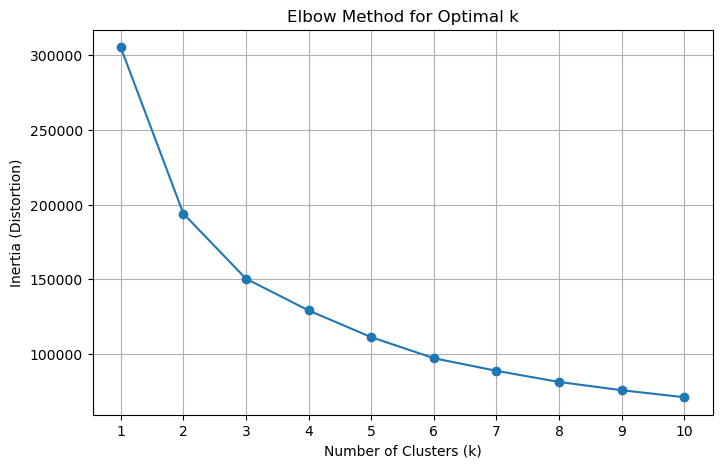

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create elbow method visualization
def plot_elbow_method(data, max_clusters=10):
    distortions = []
    K = range(1, max_clusters + 1)

    for k in K:
        kmeans = KMeans(init="k-means++", n_clusters=k, n_init=12, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Distortion)")
    plt.title("Elbow Method for Optimal k")
    plt.xticks(K)
    plt.grid(True)
    plt.show()

# Call the function to visualize the elbow method
plot_elbow_method(data_array, max_clusters=10)

In [ ]:
# Function to visualize silhouette scores
def plot_silhouette_visualization(data, n_clusters):
    # Initialize K-Means model
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=12, random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    # Silhouette score for the entire dataset
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg:.2f}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    # Create the silhouette plot
    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples in each cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Add 10 for spacing between clusters

    ax.set_title("Silhouette Plot for K-Means Clustering")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # Vertical line for average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear y-axis labels
    ax.set_xlim([-0.1, 1])
    plt.show()

# Call the function for a specific number of clusters
plot_silhouette_visualization(data_array, n_clusters=4)

#### 3.3.3: Apply PCA for Dimensionality Reduction

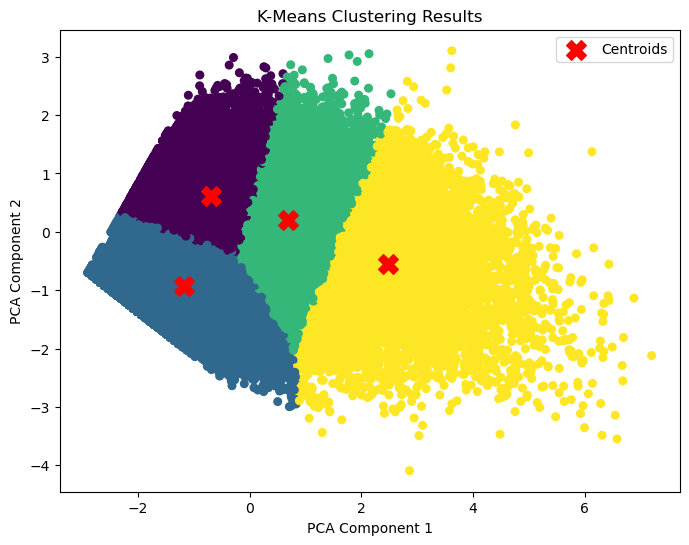

In [78]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_array) 

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

final_labels = kmeans.fit_predict(pca_data)

# Visualising clusters for K-Means in 2D
# Hint: Set n_components=2 for 2D visualisation or n_components=3 for 3D visualisation.
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

#### 3.3.4: Implement Random Hierarchical Clustering

In [80]:
#does not run/takes too long
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select a subset of relevant features to speed up clustering
selected_features = ['time_in_hospital', 'num_medications', 'num_lab_procedures']  # Focused on few features because model took too long to run
X = data[selected_features]

# Reduce sample size for faster computation
sample_size = 1000
X_sample = X.sample(n=sample_size, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)


# Initialising and fitting hierarchical clustering
n_clusters = 4
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='single')
hierarchical_labels = hierarchical.fit_predict(X)

# Evaluating with Silhouette Score
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}")

Hierarchical Clustering Silhouette Score: 0.46


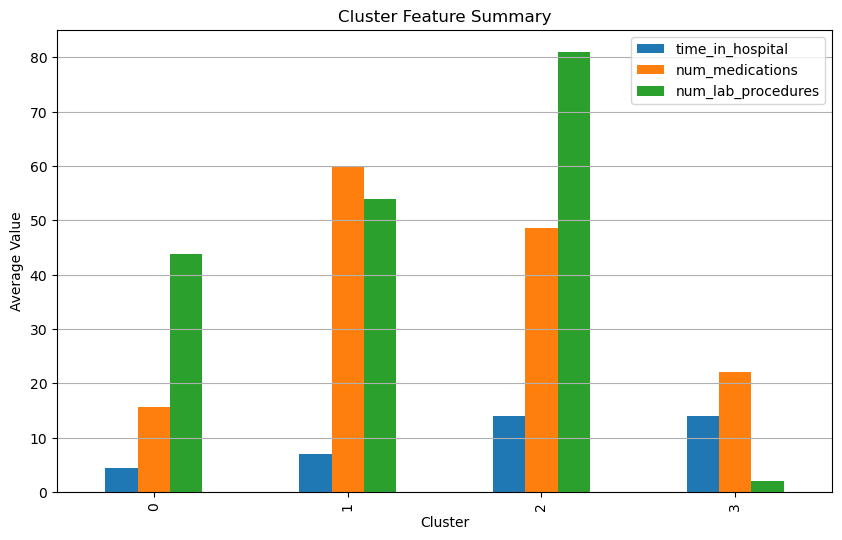

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Assuming your original dataset is named 'data'
sample_size = 1000  # Define the sample size
data_sampled = data.sample(n=sample_size, random_state=42)  # Create a subset of the original data

# Select features for clustering
features = ['time_in_hospital', 'num_medications', 'num_lab_procedures']
X_sample = data_sampled[features]

# Perform Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='single')
hierarchical_labels = hierarchical.fit_predict(X_sample)

# Add cluster labels to the sampled data
data_sampled['cluster'] = hierarchical_labels

# Calculate mean values for each feature by cluster
cluster_summary = data_sampled.groupby('cluster')[features].mean()

# Plot bar chart
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title("Cluster Feature Summary")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.legend(loc="upper right")
plt.grid(axis='y')
plt.show()


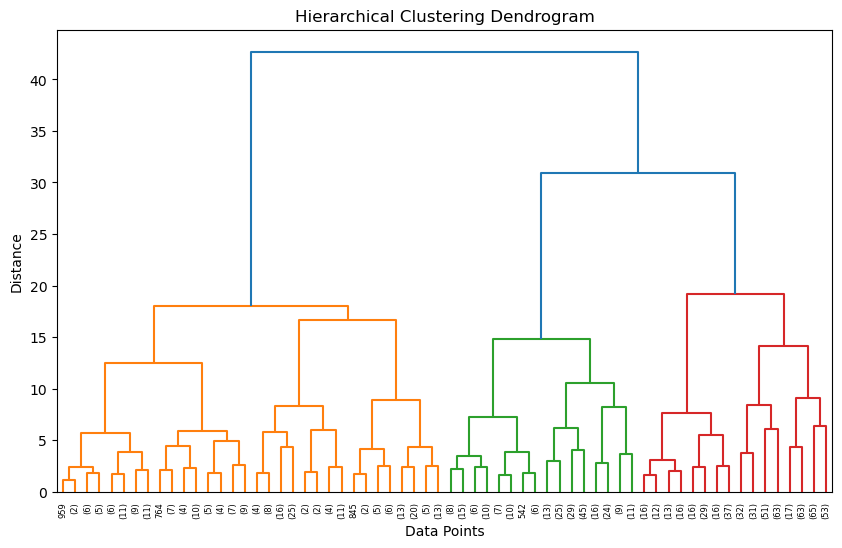

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Compute the linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')  # You can change 'ward' to 'single' or 'complete'

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # Truncates after 5 levels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [89]:
from sklearn.metrics import silhouette_score

# Silhouette Score (overall clustering performance)
silhouette_avg = silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg:.2f}")

# Analyze cluster composition
cluster_composition = pd.DataFrame({
    'cluster': hierarchical_labels,
    'time_in_hospital': X_sample['time_in_hospital'],  # Example feature
    'num_medications': X_sample['num_medications']
}).groupby('cluster').mean()

print("Cluster Composition:\n", cluster_composition)


Silhouette Score for Hierarchical Clustering: 0.45
Cluster Composition:
          time_in_hospital  num_medications
cluster                                   
0                4.361446        15.603414
1                7.000000        60.000000
2               14.000000        48.500000
3               14.000000        22.000000


#### 3.3.5: Implement DBSCAN for Density-Based Clustering

In [34]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
X_scaled = StandardScaler().fit_transform(X_sample)

# Adjust eps and min_samples for more clusters
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)

# Assign clusters to the dataset
DBSCAN_dataset = X_sample.copy()
DBSCAN_dataset['Cluster'] = dbscan.labels_

# Filtering noise points (labeled as -1)
cluster_counts = DBSCAN_dataset['Cluster'].value_counts().to_frame()
print("Cluster counts including noise:\n", cluster_counts)

DBSCAN_filtered = DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1]

# Check if there are at least 2 clusters (excluding noise)
if len(DBSCAN_filtered['Cluster'].unique()) > 1:
    dbscan_silhouette = silhouette_score(
        DBSCAN_filtered[selected_features], DBSCAN_filtered['Cluster']
    )
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.2f}")
else:
    print("Silhouette Score cannot be calculated (less than 2 clusters).")


# changing eps greatlehy changes the silhoutte score because it controls the distance between points to form clusters. 
# With a eps around 0.1, all data largely fits into one category with very few it others. This means a high silhoutte score is not always ideal. 
# I settled for 0.6 because this the first eps where more than 2 clusters form.



Cluster counts including noise:
          count
Cluster       
-1         970
 1          12
 2           8
 0           5
 3           5
DBSCAN Silhouette Score (excluding noise): 0.29


#### 3.3.6: Evaluation and Model Comparison

In [35]:
# Summary of Silhouette Scores
results = {
    "Clustering Method": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette]
}
results_df = pd.DataFrame(results)
display(results_df)
print()

Clustering Method  Silhouette Score
0           K-Means          0.253287
1      Hierarchical          0.458384
2            DBSCAN          0.291351

#### Expected Output for Model Comparison in 3.3.6:
| Clustering Method | Silhouette Score |
|     ---           |    --   |
| K-Means           |  |
| Hierarchical      |  |
| DBSCAN            |  |

++++++++++
### **3.4 Feature Engineering and Feature Selection**
Select the most relevant features to improve model performance

#### 3.4.1: Feature Engineering

In [1]:
import pandas as pd


# Load the dataset
df = pd.read_csv('regression_diabetic_data.csv')

# Standardising column names and remove duplicates
df

gender  age  admission_type_id  discharge_disposition_id  \
0          0.0    5                  6                        25   
1          0.0   15                  1                         1   
2          0.0   25                  1                         1   
3          1.0   35                  1                         1   
4          1.0   45                  1                         1   
...        ...  ...                ...                       ...   
101761     1.0   75                  1                         3   
101762     0.0   85                  1                         4   
101763     1.0   75                  1                         1   
101764     0.0   85                  2                         3   
101765     1.0   75                  1                         1   

        admission_source_id  time_in_hospital  num_lab_procedures  \
0                         1                 1                  41   
1                         7                 3                  59   
2                         7                 2                  11   
3                         7                 2                  44   
4                         7                 1                  51   
...                     ...               ...                 ...   
101761                    7                 3                  51   
101762                    5                 5                  33   
101763                    7                 1                  53   
101764                    7                10                  45   
101765                    7                 6                  13   

        num_procedures  num_medications  number_outpatient  ...  \
0                    0                1                  0  ...   
1                    0               18                  0  ...   
2                    5               13                  2  ...   
3                    1               16                  0  ...   
4                    0                8                  0  ...   
...                ...              ...                ...  ...   
101761               0               16                  0  ...   
101762               3               18                  0  ...   
101763               0                9                  1  ...   
101764               2               21                  0  ...   
101765               3                3                  0  ...   

        glimepiride-pioglitazone  metformin-rosiglitazone  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
101761                         0                        0   
101762                         0                        0   
101763                         0                        0   
101764                         0                        0   
101765                         0                        0   

        metformin-pioglitazone  change  diabetesMed  readmitted  race_Asian  \
0                            0       0            0           2       False   
1                            0       1            1           1       False   
2                            0       0            1           2       False   
3                            0       1            1           2       False   
4                            0       1            1           2       False   
...                        ...     ...          ...         ...         ...   
101761                       0       1            1           1       False   
101762                       0       0            1           2       False   
101763                       0       1            1           2       False   
101764                       0    

In [2]:
Feature Engineering:

Create new features, such as:
age_group: Converting age intervals into categorical labels (e.g., "young", "middle-aged", "elderly").
visit_history: Summing number_outpatient, number_emergency, and number_inpatient to create a comprehensive variable representing prior medical history.

SyntaxError: invalid syntax (4041067369.py, line 1)

In [2]:
#meta data mapping
admission_type_mapping = {
    1: 'Emergency', 2: 'Urgent', 3: 'Elective', 4: 'Newborn', 5: 'Trauma Center',
    6: 'Not Available', 7: 'Unknown', 8: 'Other'
}

In [4]:
discharge_disposition_mapping = {
    1: 'Discharged to home', 2: 'Discharged to another short-term hospital',
    3: 'Discharged to SNF', 4: 'Discharged to ICF', 5: 'Discharged to another facility',
    6: 'Discharged to home under care', 7: 'Left AMA', 8: 'Discharged to home with IV',
    9: 'Admitted as inpatient to this hospital', 10: 'Neonate discharged to another hospital',
    11: 'Expired', 12: 'Discharged to psych hospital', 13: 'Discharged to rehab',
    14: 'Discharged to long-term care', 15: 'Discharged to another hospital outpatient facility',
    16: 'Unknown', 17: 'Discharged to federally qualified health center'
}

In [5]:
admission_source_mapping = {
    1: 'Physician Referral', 2: 'Clinic Referral', 3: 'HMO Referral', 4: 'Transfer from hospital',
    5: 'Transfer from SNF', 6: 'Transfer from another facility', 7: 'Emergency Room',
    8: 'Court/Law Enforcement', 9: 'Not Available', 10: 'Transfer from rehab',
    11: 'Unknown', 12: 'Other'
}

In [6]:
df['admission_type_id'] = df['admission_type_id'].map(admission_type_mapping)
df['discharge_disposition_id'] = df['discharge_disposition_id'].map(discharge_disposition_mapping)
df['admission_source_id'] = df['admission_source_id'].map(admission_source_mapping)

In [7]:

df.fillna('Unknown', inplace=True)


In [8]:
df.head()

gender  age admission_type_id discharge_disposition_id admission_source_id  \
0     0.0    5     Not Available                  Unknown  Physician Referral   
1     0.0   15         Emergency       Discharged to home      Emergency Room   
2     0.0   25         Emergency       Discharged to home      Emergency Room   
3     1.0   35         Emergency       Discharged to home      Emergency Room   
4     1.0   45         Emergency       Discharged to home      Emergency Room   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  ...  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                  0  ...                         0                        0   
1                  0  ...                         0                        0   
2                  2  ...                         0                        0   
3                  0  ...                         0                        0   
4                  0  ...                         0                        0   

   metformin-pioglitazone  change  diabetesMed  readmitted  race_Asian  \
0                       0       0            0           2       False   
1                       0       1            1           1       False   
2                       0       0            1           2       False   
3                       0       1            1           2       False   
4                       0       1            1           2       False   

   race_Caucasian  race_Hispanic  race_Unknown  
0            True          False         False  
1            True          False         False  
2           False          False         False  
3            True          False         False  
4            True          False         False  

[5 rows x 46 columns]

In [9]:
bins = [0, 2, 7, float('inf')]  # Bin edges: 0-2, 3-7, 8+
labels = ['Short Stay', 'Medium Stay', 'Long Stay']

# Create classification feature
df['hospital_stay_category'] = pd.cut(df['time_in_hospital'], bins=bins, labels=labels, right=False)


In [10]:
# Define a function to map ages to categories
def age_to_category(age):
    if age in [5, 15]:
        return 'Child'
    elif age in [25, 35]:
        return 'Young Adult'
    elif age in [45, 55]:
        return 'Adult'
    elif age in [65, 75]:
        return 'Senior'
    elif age in [85, 95]:
        return 'Elderly'
    else:
        return 'Unknown' 

# Apply the function to create a new column for age categories
df['age_category'] = df['age'].apply(age_to_category)

# Check the result
print(df[['age', 'age_category']].head())

   age age_category
0    5        Child
1   15        Child
2   25  Young Adult
3   35  Young Adult
4   45        Adult


In [11]:
df.head()

gender  age admission_type_id discharge_disposition_id admission_source_id  \
0     0.0    5     Not Available                  Unknown  Physician Referral   
1     0.0   15         Emergency       Discharged to home      Emergency Room   
2     0.0   25         Emergency       Discharged to home      Emergency Room   
3     1.0   35         Emergency       Discharged to home      Emergency Room   
4     1.0   45         Emergency       Discharged to home      Emergency Room   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  ...  metformin-pioglitazone  change  diabetesMed  \
0                  0  ...                       0       0            0   
1                  0  ...                       0       1            1   
2                  2  ...                       0       0            1   
3                  0  ...                       0       1            1   
4                  0  ...                       0       1            1   

   readmitted  race_Asian  race_Caucasian  race_Hispanic  race_Unknown  \
0           2       False            True          False         False   
1           1       False            True          False         False   
2           2       False           False          False         False   
3           2       False            True          False         False   
4           2       False            True          False         False   

   hospital_stay_category  age_category  
0              Short Stay         Child  
1             Medium Stay         Child  
2             Medium Stay   Young Adult  
3             Medium Stay   Young Adult  
4              Short Stay         Adult  

[5 rows x 48 columns]

In [2]:

columns_to_sum = [
    'num_procedures', 'num_medications', 
    'number_inpatient', 'number_outpatient', 'number_emergency'
]
# Create the total_medical_involvement column as the sum of the specified columns
df['total_medical_involvement'] = df[columns_to_sum].sum(axis=1)

# Display the first few rows of the new column
print(df[['num_procedures', 'num_medications', 
          'number_inpatient', 'number_outpatient', 'number_emergency', 
          'total_medical_involvement']].head())


   num_procedures  num_medications  number_inpatient  number_outpatient  \
0               0                1                 0                  0   
1               0               18                 0                  0   
2               5               13                 1                  2   
3               1               16                 0                  0   
4               0                8                 0                  0   

   number_emergency  total_medical_involvement  
0                 0                          1  
1                 0                         18  
2                 0                         21  
3                 0                         17  
4                 0                          8  


In [50]:
# Combine one-hot encoded race columns into a single 'race' column
race_columns = ['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Unknown']
df['race'] = df[race_columns].idxmax(axis=1).str.replace('race_', '')

# Drop original race columns if no longer needed
df.drop(columns=race_columns, inplace=True)


In [51]:
# Check for missing data and fill or drop as needed
df.fillna({'race': 'Unknown'}, inplace=True)

In [23]:
# Map gender values
df['gender'] = df['gender'].map({0.0: 'Female', 1.0: 'Male'})

In [16]:

df.to_csv('feature_diabetic_data.csv', index=False)

In [17]:
df = pd.read_csv('feature_diabetic_data.csv')

In [56]:
df.head()

gender  age  admission_type_id  discharge_disposition_id  \
0     0.0    5                  6                        25   
1     0.0   15                  1                         1   
2     0.0   25                  1                         1   
3     1.0   35                  1                         1   
4     1.0   45                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  number_outpatient  ...  metformin-rosiglitazone  \
0                1                  0  ...                        0   
1               18                  0  ...                        0   
2               13                  2  ...                        0   
3               16                  0  ...                        0   
4                8                  0  ...                        0   

   metformin-pioglitazone  change  diabetesMed  readmitted  race_Asian  \
0                       0       0            0           2       False   
1                       0       1            1           1       False   
2                       0       0            1           2       False   
3                       0       1            1           2       False   
4                       0       1            1           2       False   

   race_Caucasian  race_Hispanic  race_Unknown  total_medical_involvement  
0            True          False         False                          2  
1            True          False         False                         21  
2           False          False         False                         23  
3            True          False         False                         19  
4            True          False         False                          9  

[5 rows x 47 columns]

In [32]:
# Feature importance for Decision Tree or Gradient Boosting
importances = tree_model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importances")
plt.show()

NameError: name 'tree_model' is not defined

#### 3.4.2: Generate Statistical Features
Calculate aggregate statistics such as mean, max, min, or standard deviation for features if relevant

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                   'num_medications', 'number_outpatient', 'number_emergency',
                   'number_inpatient', 'number_diagnoses', 'total_medical_involvement']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df[numeric_columns].describe())


       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      1.017660e+05        1.017660e+05    1.017660e+05     1.017660e+05   
mean       1.452282e-17       -1.284711e-17   -3.979810e-18     5.027129e-18   
std        1.000005e+00        1.000005e+00    1.000005e+00     1.000005e+00   
min       -1.137649e+00       -2.139630e+00   -7.853977e-01    -1.848268e+00   
25%       -8.026506e-01       -6.147950e-01   -7.853977e-01    -7.409197e-01   
50%       -1.326548e-01        4.596660e-02   -1.991621e-01    -1.257264e-01   
75%        5.373411e-01        7.067282e-01    3.870736e-01     4.894670e-01   
max        3.217324e+00        4.518815e+00    2.732016e+00     7.994826e+00   

       number_outpatient  number_emergency  number_inpatient  \
count       1.017660e+05      1.017660e+05      1.017660e+05   
mean        1.005426e-17      1.228854e-17     -4.119453e-17   
std         1.000005e+00      1.000005e+00      1.000005e+00   
min        -2.914615e-0

In [52]:

    
    # Calculate total interactions
df['total_interactions'] = df[['number_inpatient', 'number_outpatient']].sum(axis=1)
    
    # Create the average_medical_involvement feature
df['average_medical_involvement'] = df['total_medical_involvement'] / df['total_interactions']
    

print(df[['average_medical_involvement']].head())



   average_medical_involvement
0                          inf
1                          inf
2                     7.666667
3                          inf
4                          inf


In [53]:
df.head()

gender  age  admission_type_id  discharge_disposition_id  \
0     0.0    5                  6                        25   
1     0.0   15                  1                         1   
2     0.0   25                  1                         1   
3     1.0   35                  1                         1   
4     1.0   45                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  number_outpatient  ...  glimepiride-pioglitazone  \
0                1                  0  ...                         0   
1               18                  0  ...                         0   
2               13                  2  ...                         0   
3               16                  0  ...                         0   
4                8                  0  ...                         0   

   metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
0                        0                       0       0            0   
1                        0                       0       1            1   
2                        0                       0       0            1   
3                        0                       0       1            1   
4                        0                       0       1            1   

   readmitted  total_medical_involvement       race  total_interactions  \
0           2                          2  Caucasian                   0   
1           1                         21  Caucasian                   0   
2           2                         23      Asian                   3   
3           2                         19  Caucasian                   0   
4           2                          9  Caucasian                   0   

   average_medical_involvement  
0                          inf  
1                          inf  
2                     7.666667  
3                          inf  
4                          inf  

[5 rows x 46 columns]

#### 3.4.3: Feature Transformation
Normalise or standardise features, especially for distance-based models like KNN or clustering

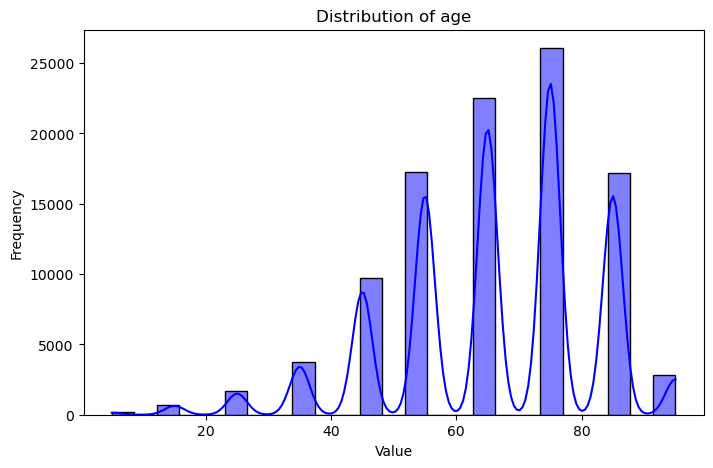

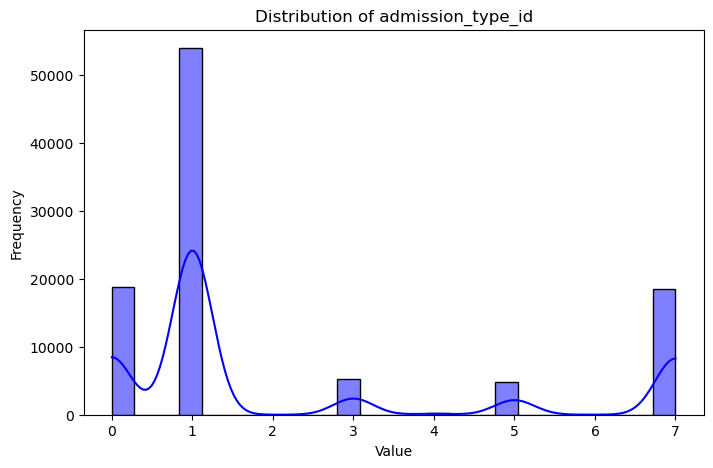

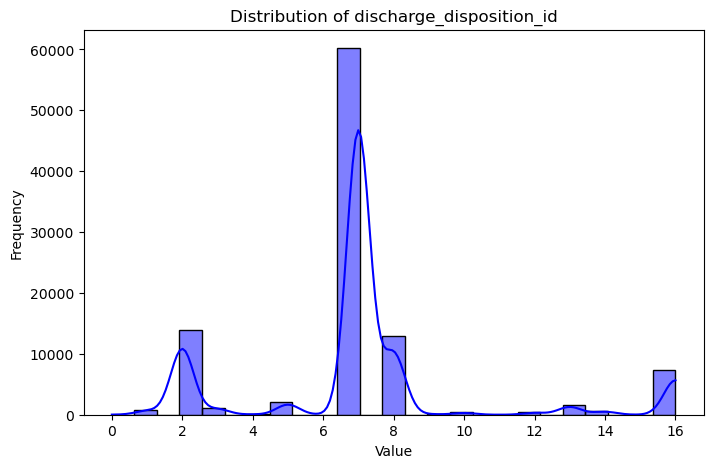

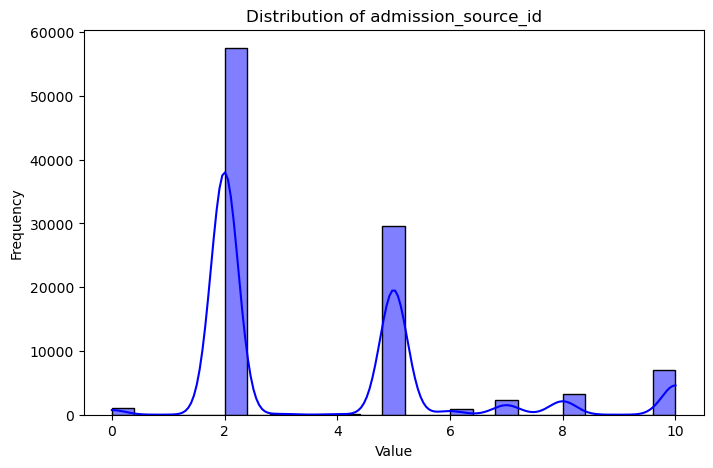

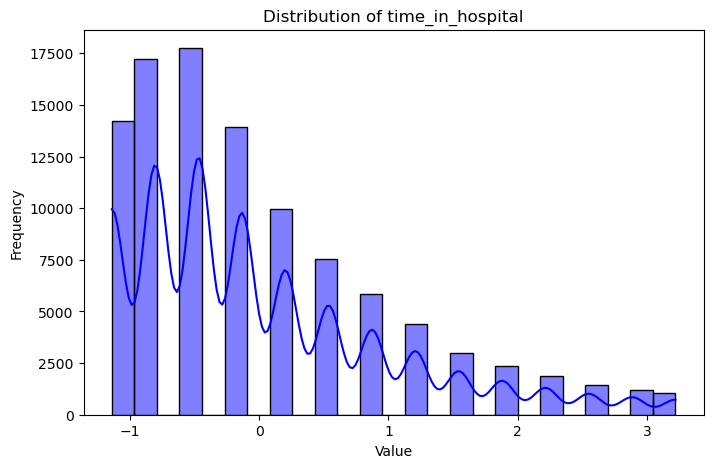

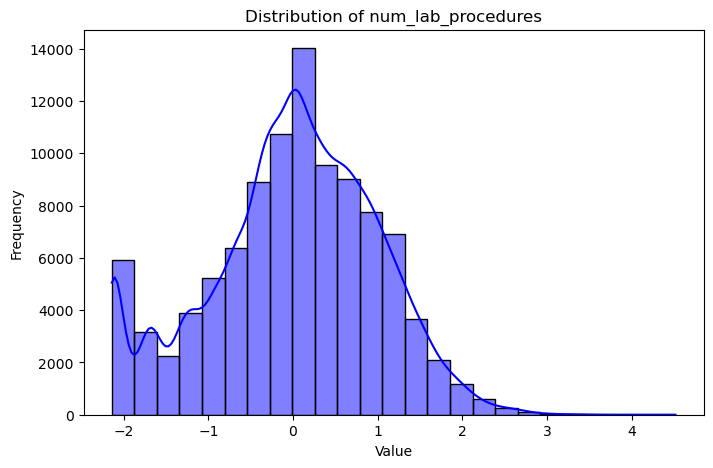

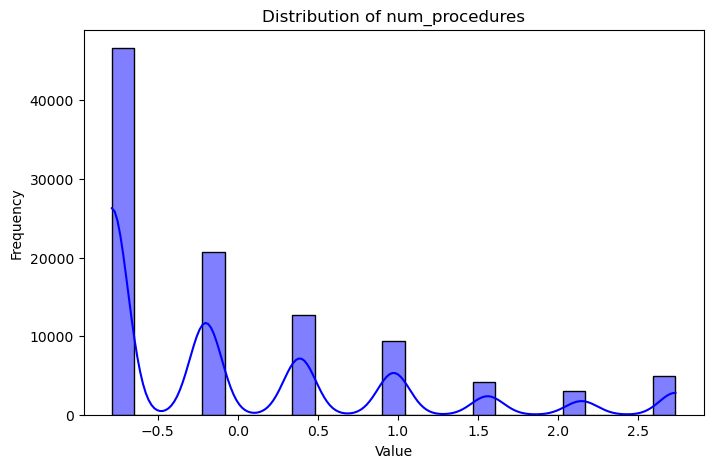

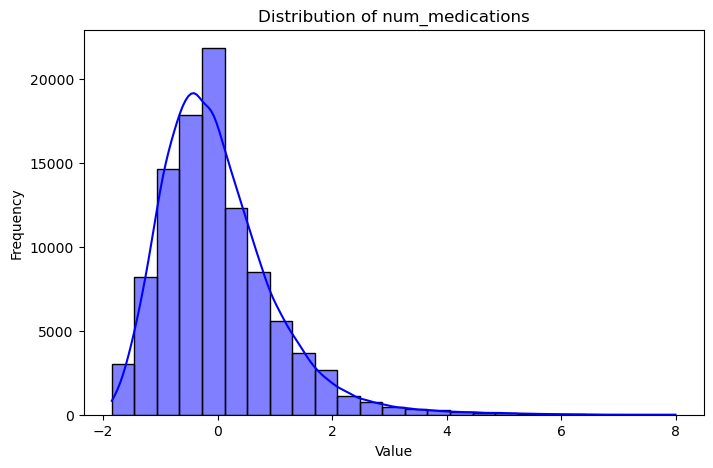

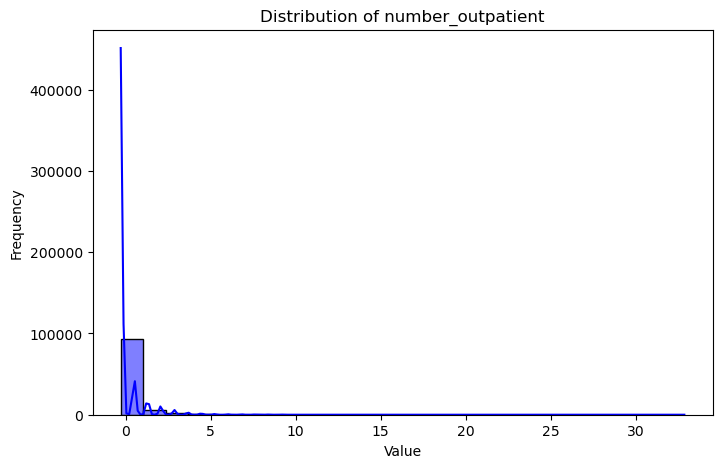

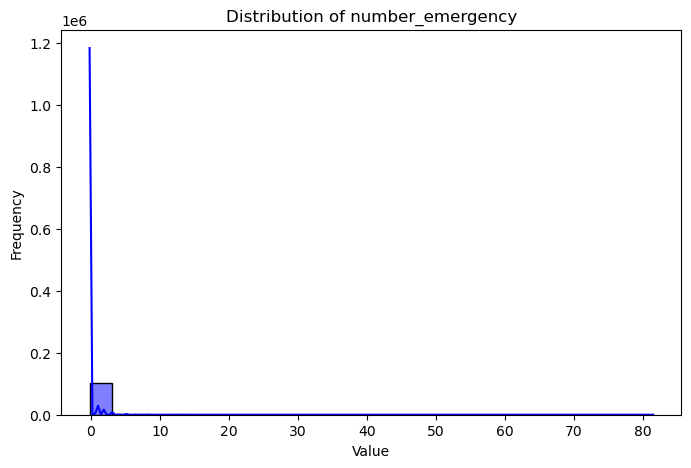

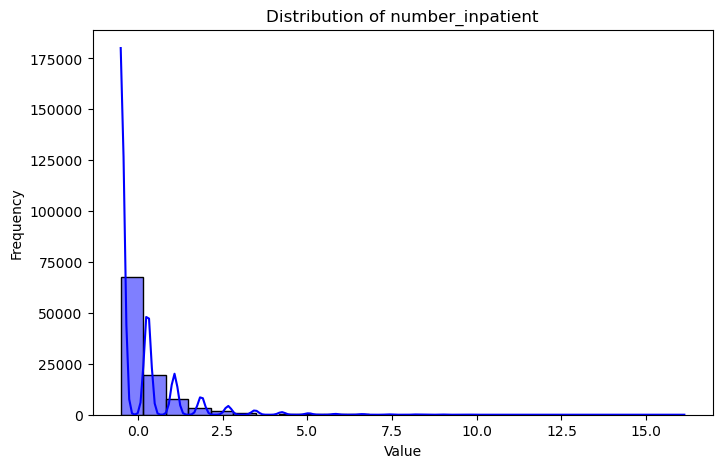

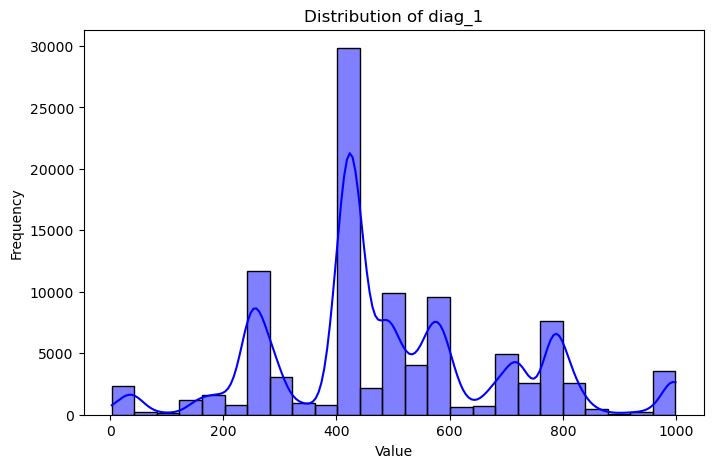

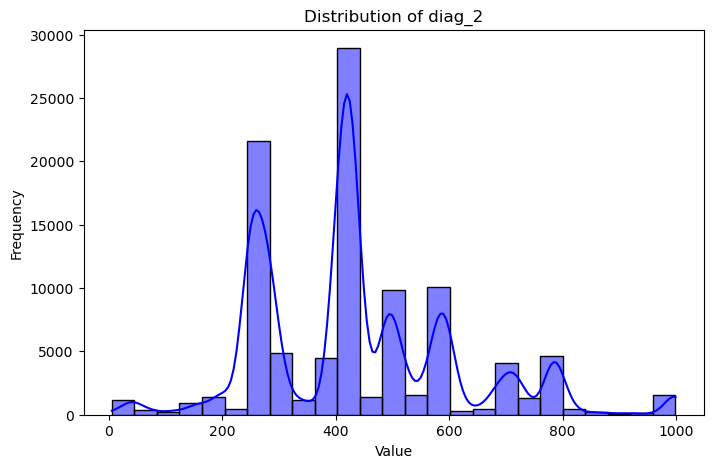

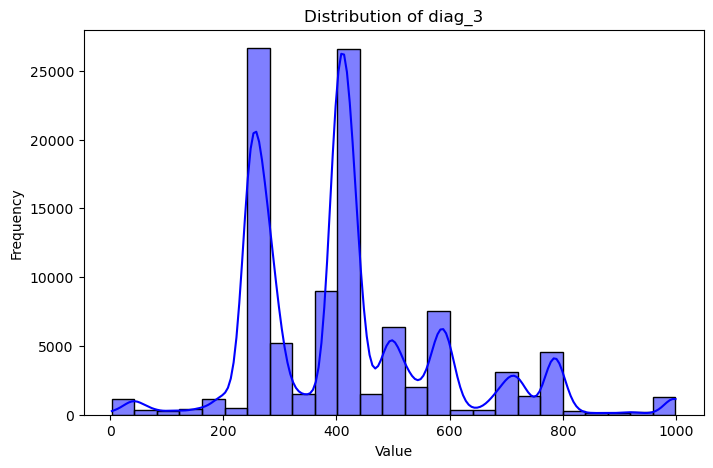

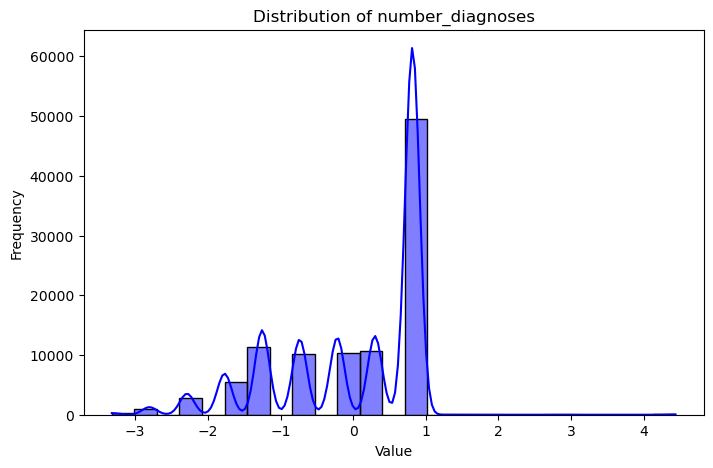

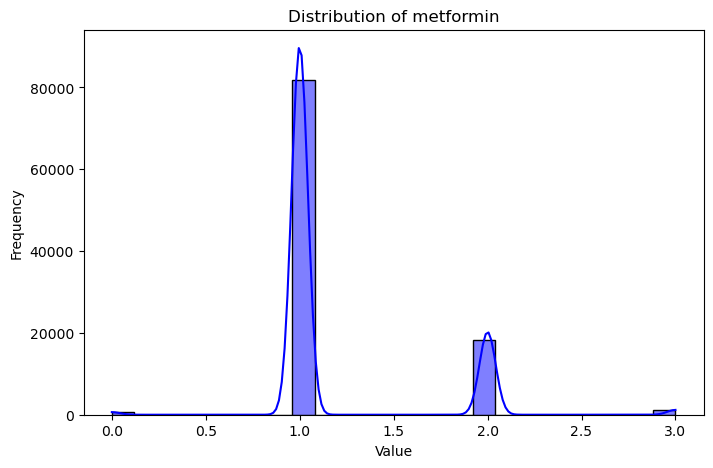

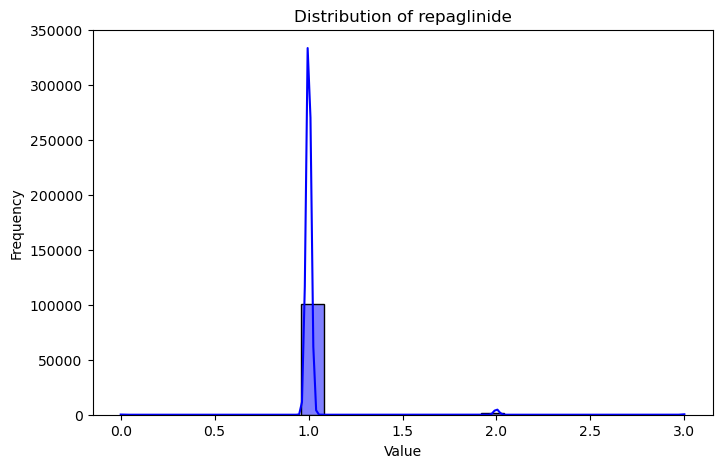

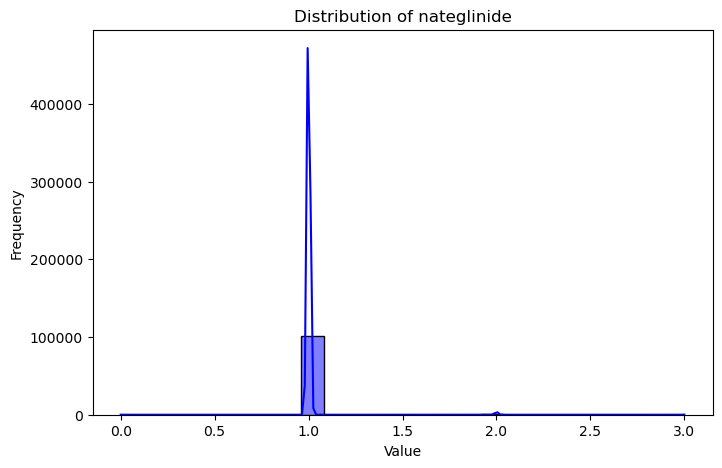

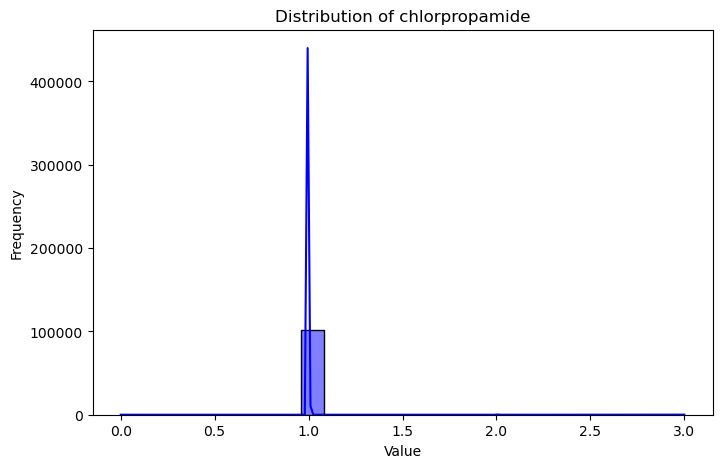

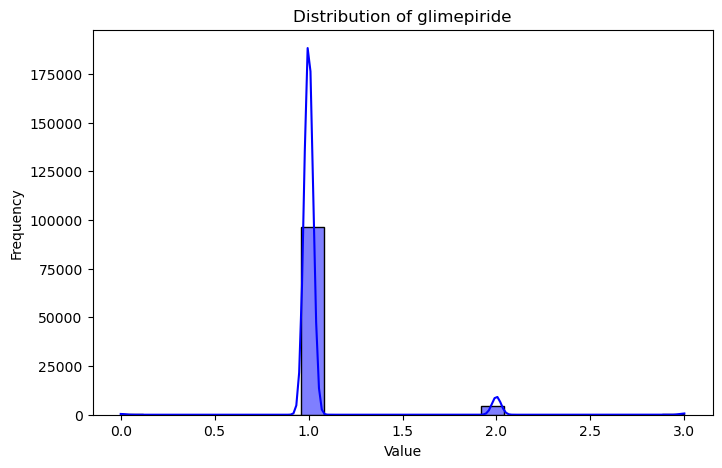

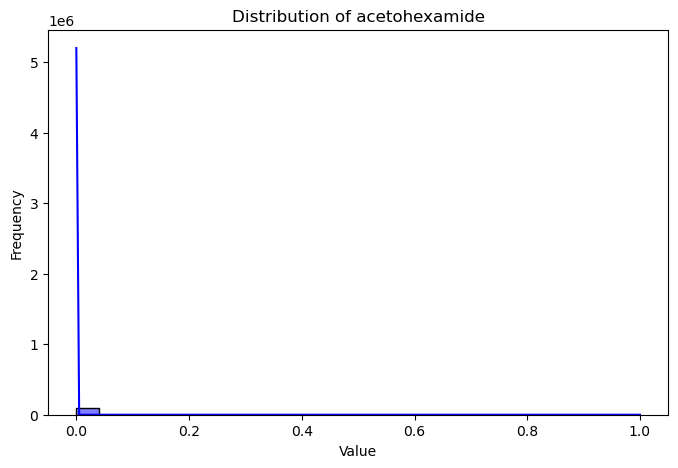

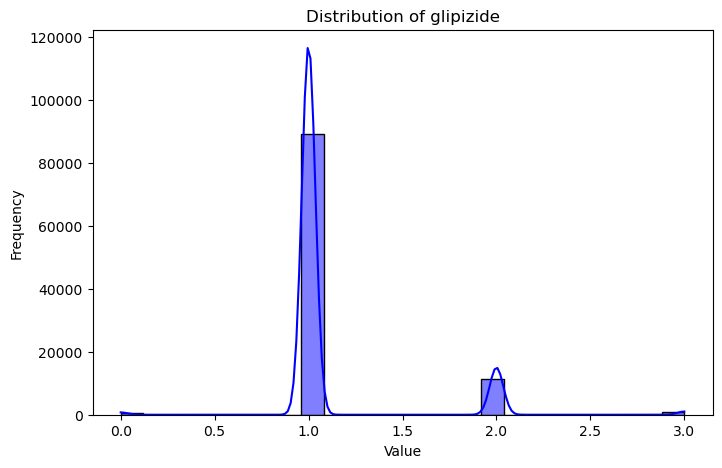

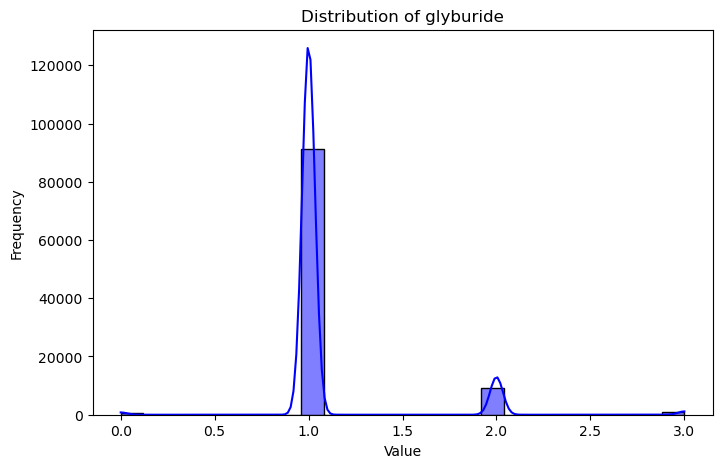

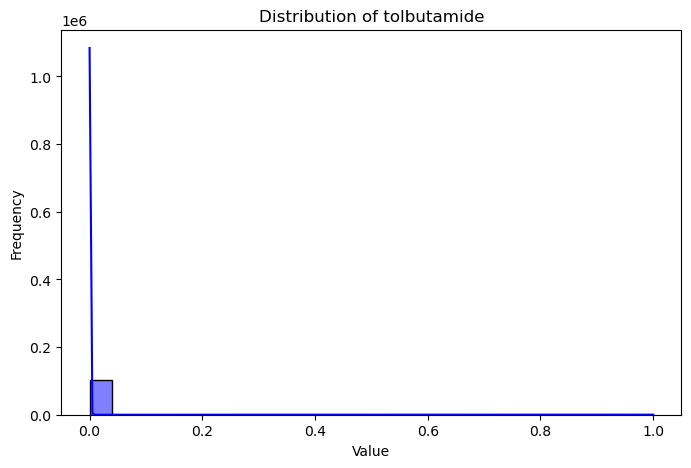

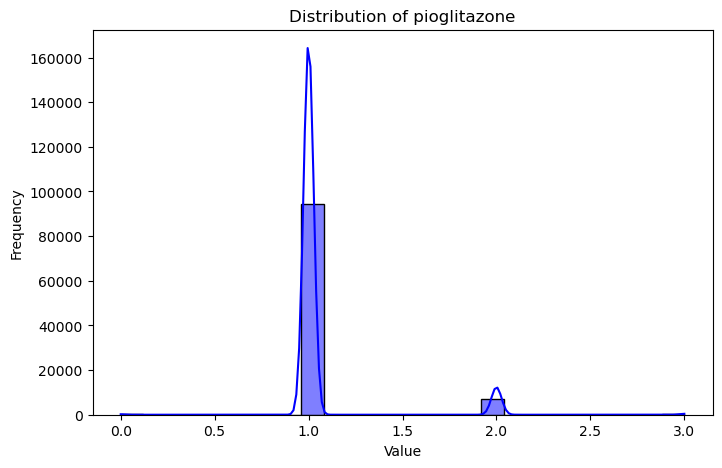

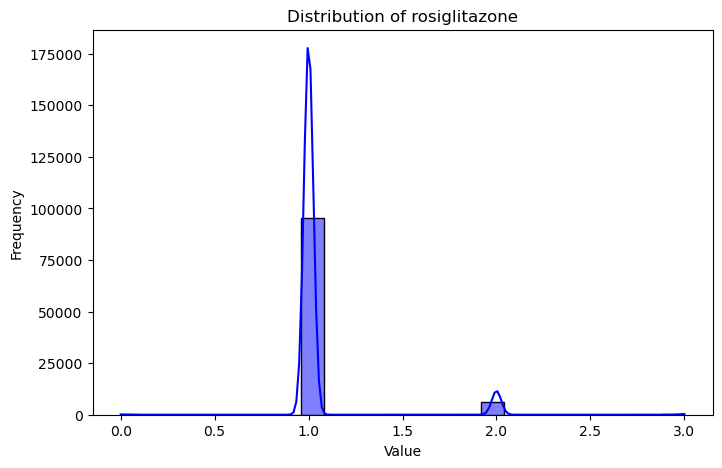

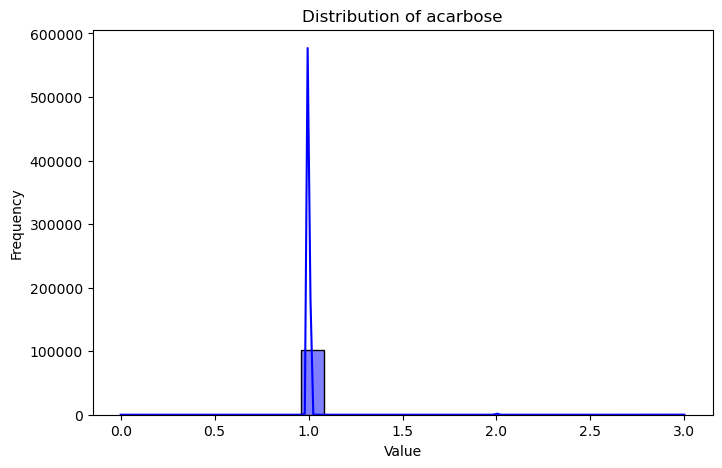

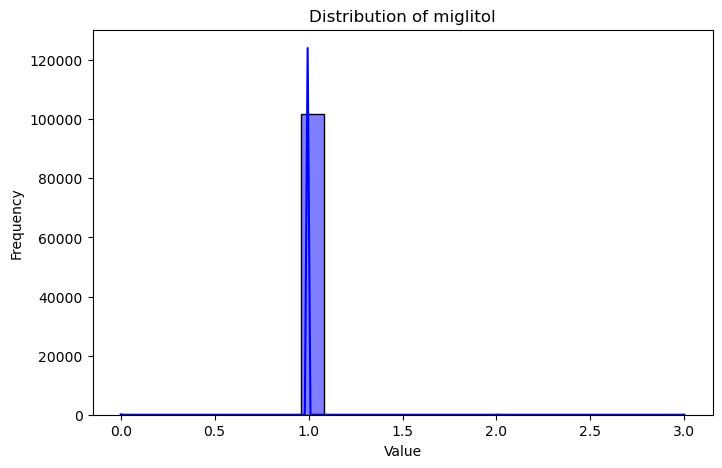

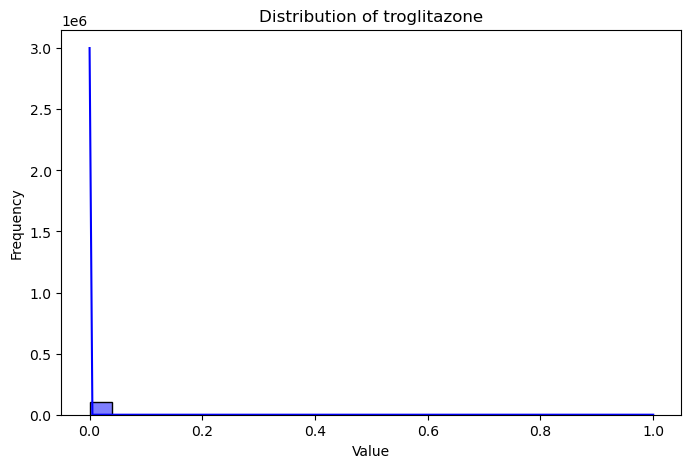

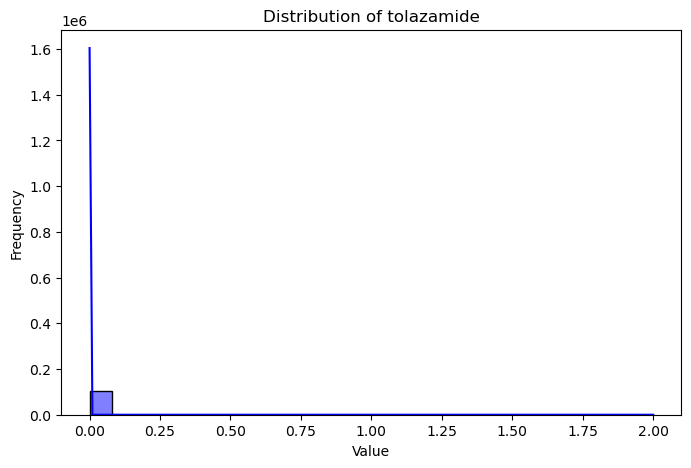

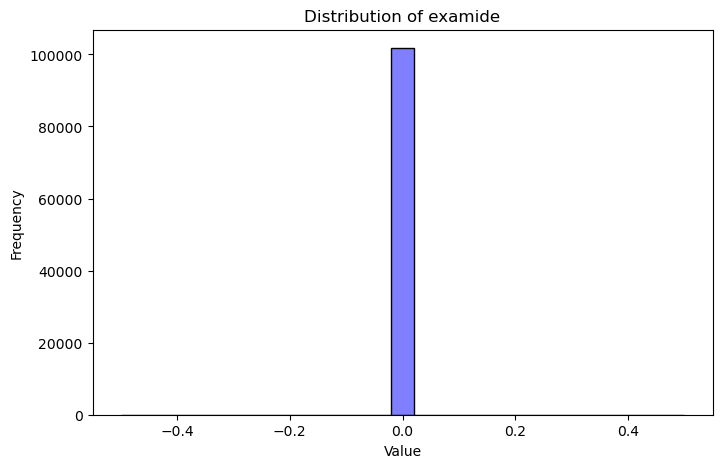

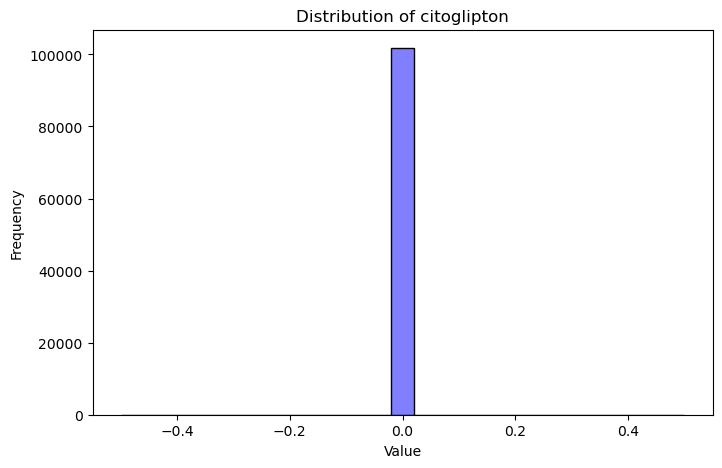

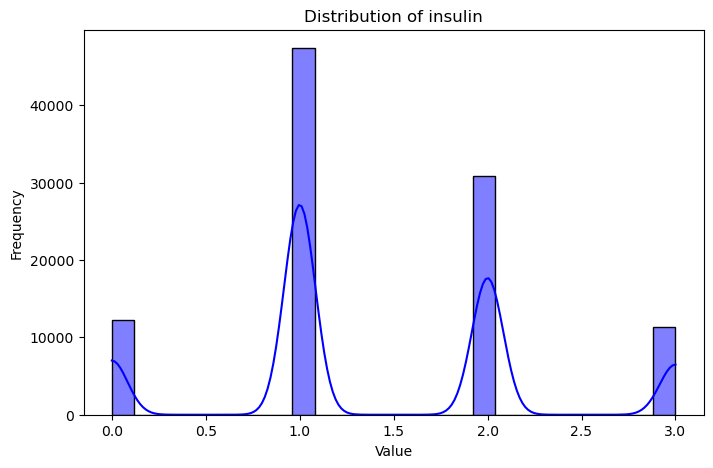

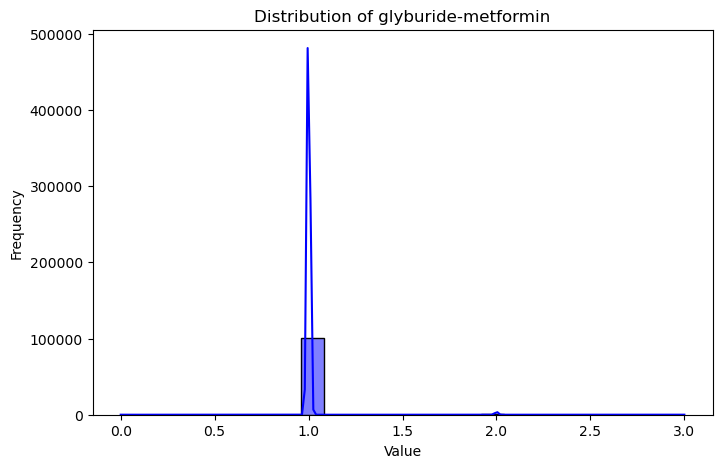

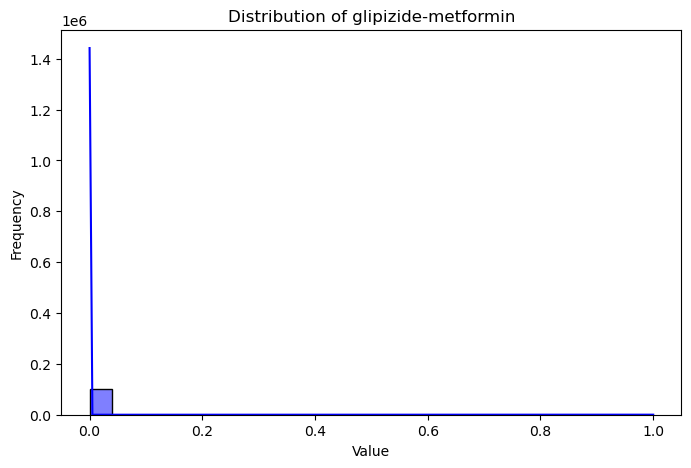

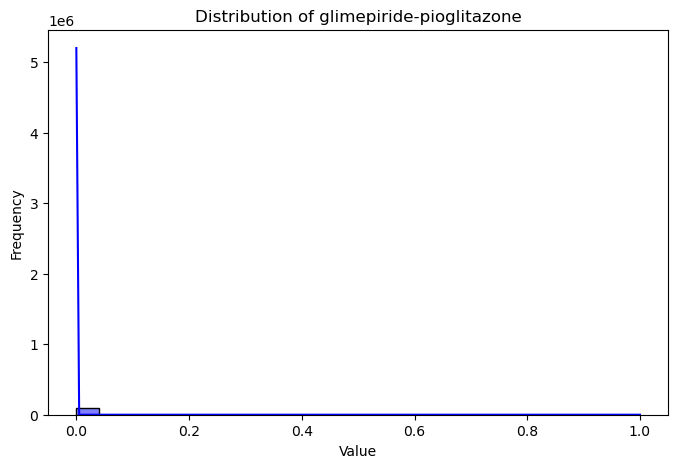

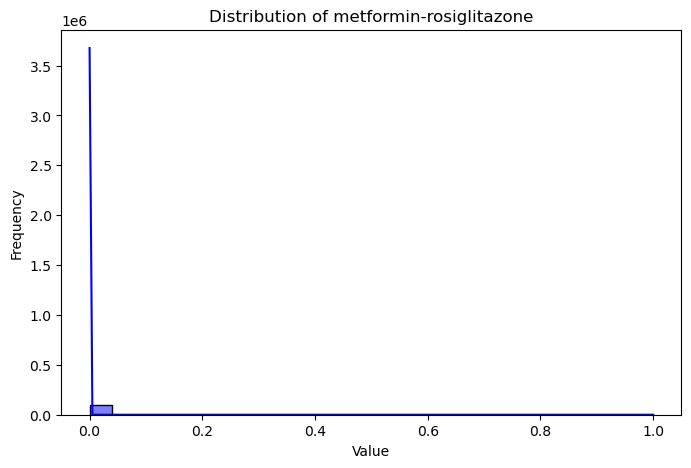

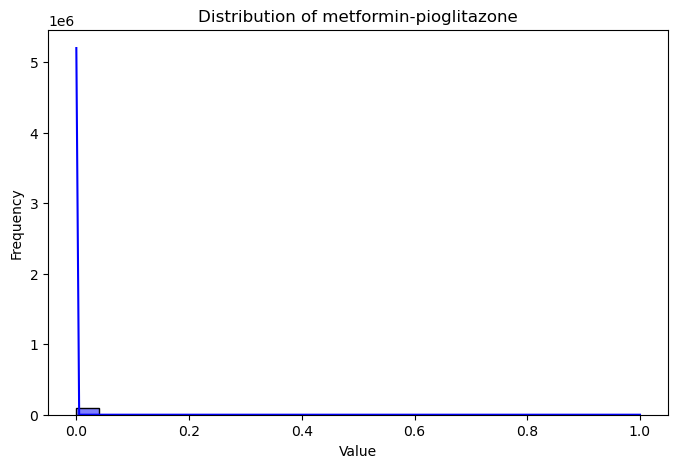

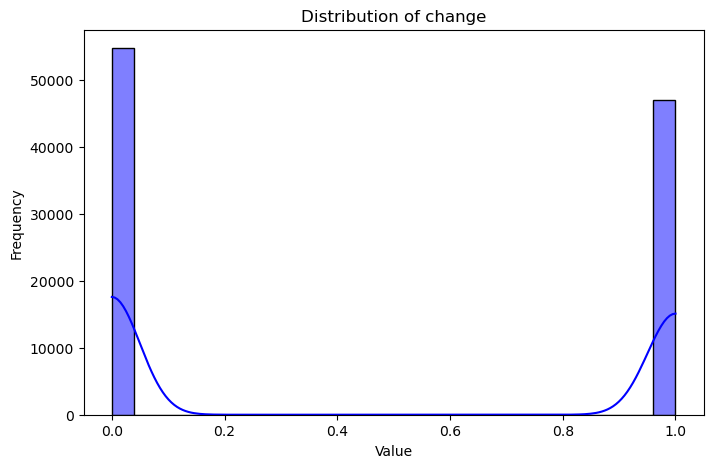

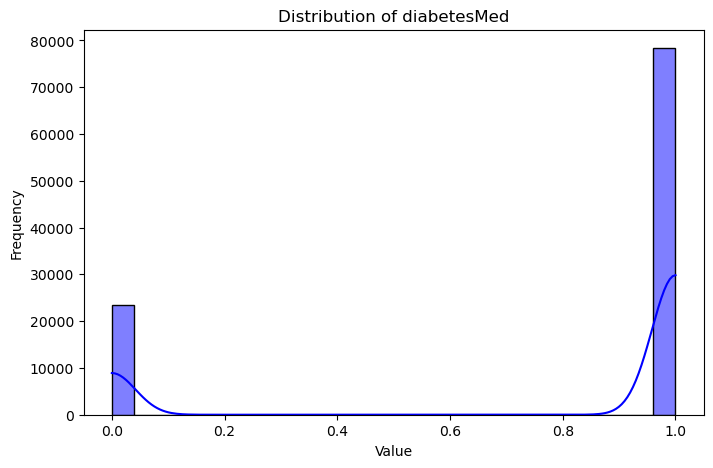

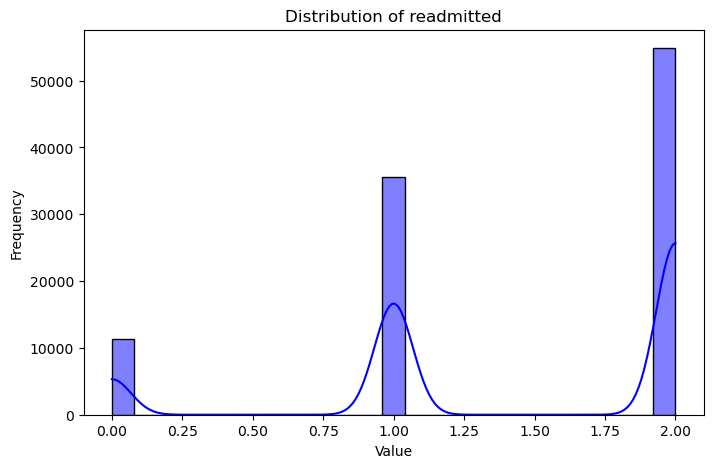

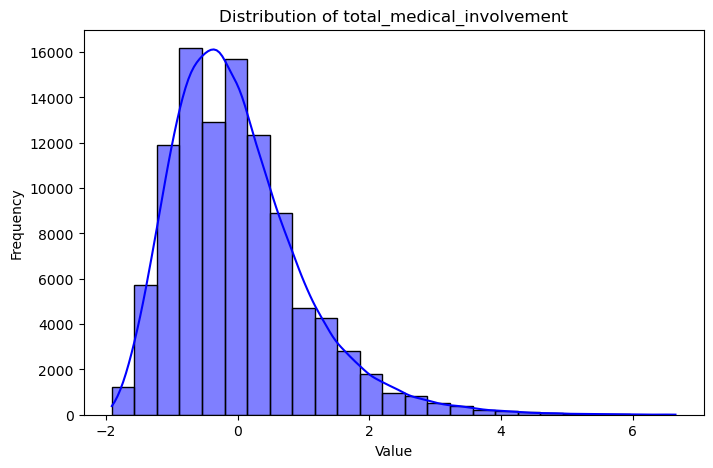

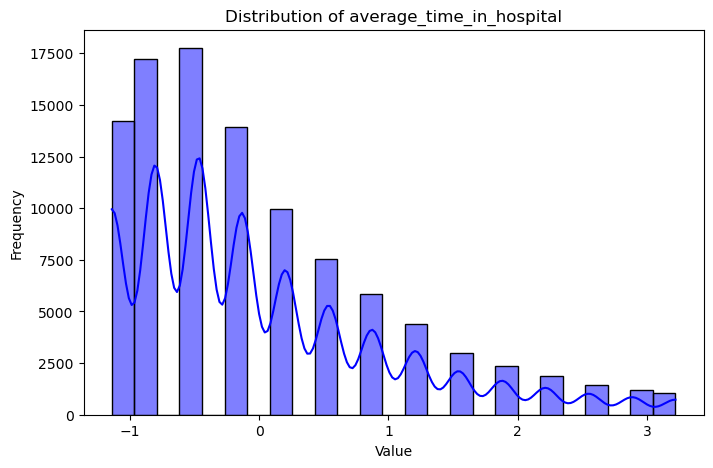

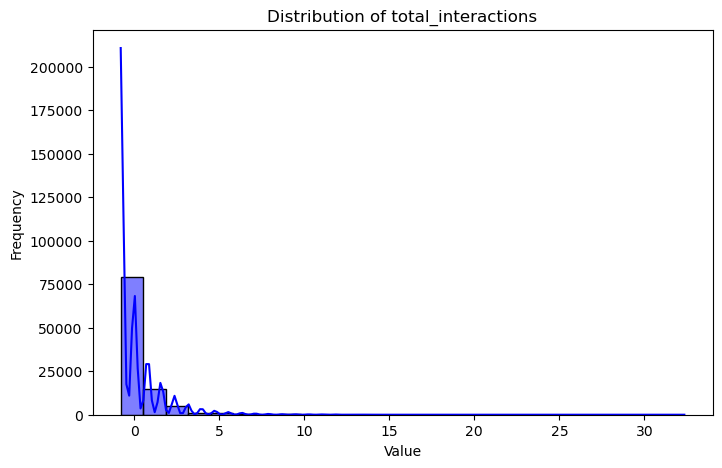

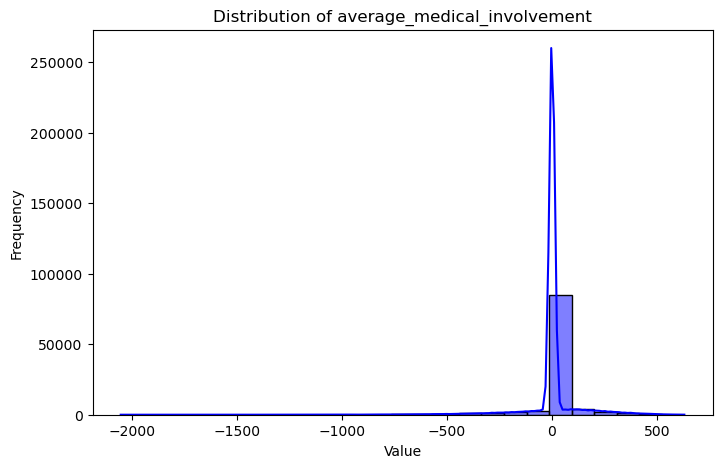

In [44]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=25, kde=True, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


In [46]:

from sklearn.preprocessing import StandardScaler

selected_features = ['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])


#### 3.4.4: Feature Selection
Use feature importance from tree-based models (Random Forest, Gradient Boosting) to select important features


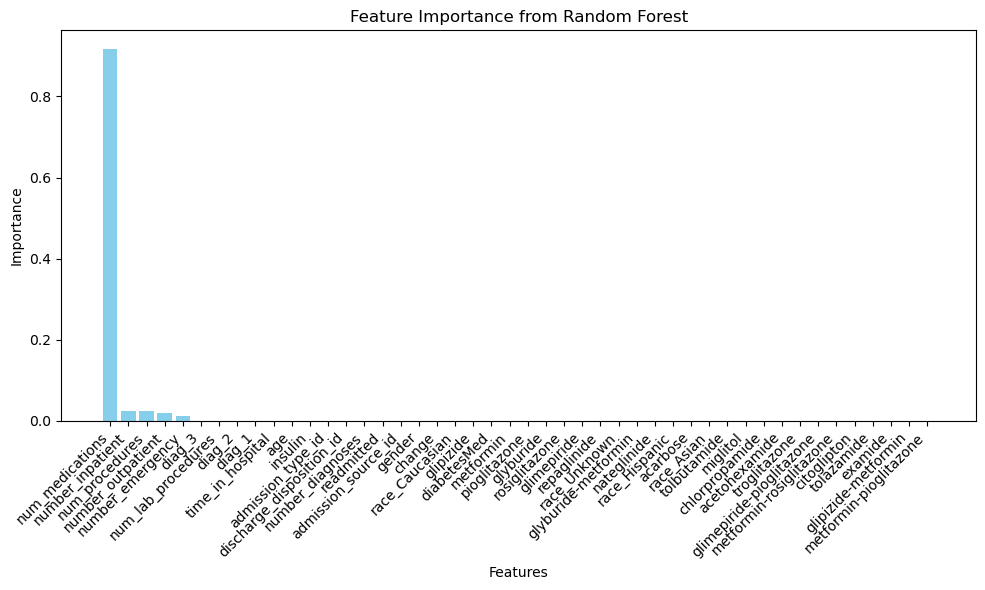

In [3]:
#used regression data set only adding in total_medical_involvement feature
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


X = df.drop(columns=["total_medical_involvement"])  
y = df["total_medical_involvement"]

# Fit Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


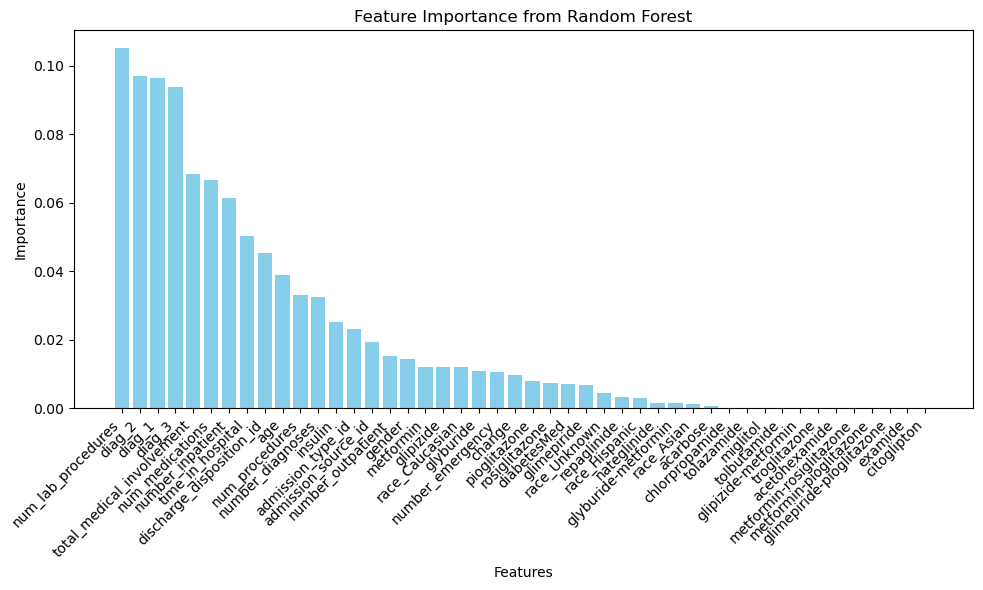

In [61]:
X = df.drop(columns=["readmitted"])  
y = df["readmitted"]

# Fit Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

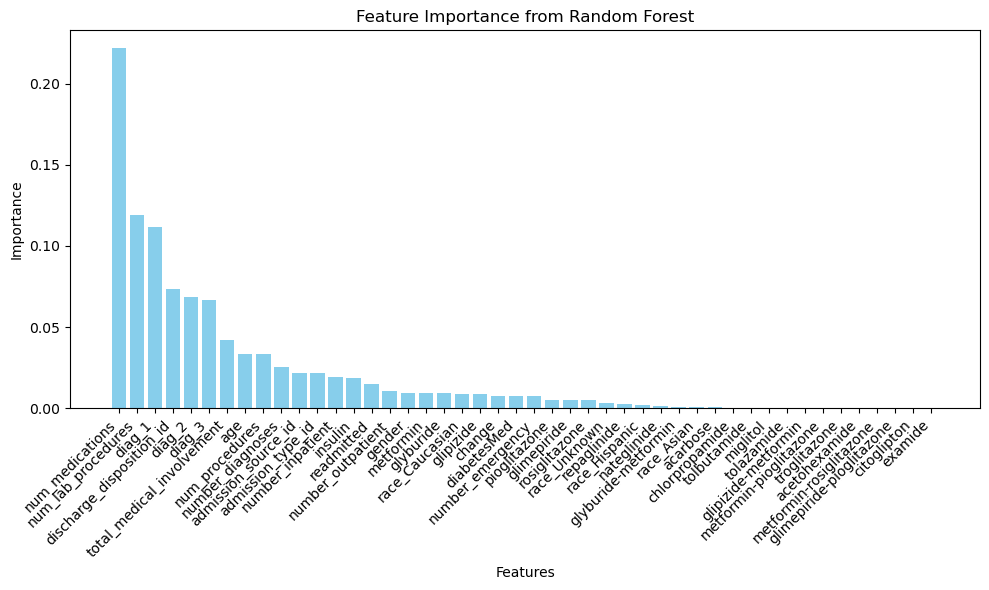

In [4]:
X = df.drop(columns=["time_in_hospital"])  
y = df["time_in_hospital"]

# Fit Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 3.4.5: Model Evaluation After Feature Selection
- After feature engineering and selection, evaluate your model with the new set of features.
- Apply cross-validation to measure the model’s performance with the refined feature set

In [5]:
# Importing required sklearn packages
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split



# Defining target and features
X = df[['age', 'time_in_hospital', 'diag_1', 'diag_2', 'diag_3', 'num_lab_procedures', 'total_medical_involvement', 'num_medications', 'number_inpatient', 'discharge_disposition_id', 'number_diagnoses']] 
y = df['readmitted']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (81412, 11)
X_test shape: (20354, 11)
y_train shape: (81412,)
y_test shape: (20354,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initializing and training Logistic Regression model
LR = LogisticRegression(max_iter=1000) 
LR.fit(X_train, y_train)

# Predictions
y_predict = LR.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro') 
precision = precision_score(y_test, y_predict, average='macro')  
recall = recall_score(y_test, y_predict, average='macro') 

# Printing the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Classification Report:\n", classification_report(y_test, y_predict))

Accuracy:  0.5650977694802004
Precision:  0.4931455872537878
Recall:  0.37545851267423913
F1 Score:  0.336251124132631
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.01      0.02      2285
           1       0.50      0.20      0.28      7117
           2       0.58      0.92      0.71     10952

    accuracy                           0.57     20354
   macro avg       0.49      0.38      0.34     20354
weighted avg       0.53      0.57      0.48     20354



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Initialize Logistic Regression model
LR = LogisticRegression(max_iter=1000)

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified for class balance

# Evaluate performance using cross_val_score
accuracy_scores = cross_val_score(LR, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(LR, X_train, y_train, cv=cv, scoring='precision_macro')
recall_scores = cross_val_score(LR, X_train, y_train, cv=cv, scoring='recall_macro')
f1_scores = cross_val_score(LR, X_train, y_train, cv=cv, scoring='f1_macro')

# Train final model and predict on the test set
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

# Evaluate performance on test set
accuracyv = accuracy_score(y_test, y_predict)
precisionv = precision_score(y_test, y_predict, average='macro')
recallv = recall_score(y_test, y_predict, average='macro')
f1v = f1_score(y_test, y_predict, average='macro')

# Print Cross-Validation Metrics
print("Cross-validated accuracy after feature selection:",)
print(f"Accuracy (CV Mean): {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Precision (CV Mean): {np.mean(precision_scores):.3f} ± {np.std(precision_scores):.3f}")
print(f"Recall (CV Mean): {np.mean(recall_scores):.3f} ± {np.std(recall_scores):.3f}")
print(f"F1 Score (CV Mean): {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")

# Print Test Set Metrics
print("\nTest Set Results:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Classification Report:\n", classification_report(y_test, y_predict))


Cross-validated accuracy after feature selection:
Accuracy (CV Mean): 0.566 ± 0.002
Precision (CV Mean): 0.504 ± 0.021
Recall (CV Mean): 0.375 ± 0.002
F1 Score (CV Mean): 0.336 ± 0.002

Test Set Results:
Accuracy:  0.5650977694802004
Precision:  0.4931455872537878
Recall:  0.37545851267423913
F1 Score:  0.336251124132631
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.01      0.02      2285
           1       0.50      0.20      0.28      7117
           2       0.58      0.92      0.71     10952

    accuracy                           0.57     20354
   macro avg       0.49      0.38      0.34     20354
weighted avg       0.53      0.57      0.48     20354



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Initialize Logistic Regression model
LR = LogisticRegression(max_iter=1000)

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Stratified for class balance

# Evaluate performance using cross_val_score
accuracy_scores = cross_val_score(LR, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(LR, X_train, y_train, cv=cv, scoring='precision_macro')
recall_scores = cross_val_score(LR, X_train, y_train, cv=cv, scoring='recall_macro')
f1_scores = cross_val_score(LR, X_train, y_train, cv=cv, scoring='f1_macro')

# Train final model and predict on the test set
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

# Evaluate performance on test set
accuracyk = accuracy_score(y_test, y_predict)
precisionk = precision_score(y_test, y_predict, average='macro')
recallk = recall_score(y_test, y_predict, average='macro')
f1k = f1_score(y_test, y_predict, average='macro')

# Print Cross-Validation Metrics
print("Cross-validated accuracy after feature selection:",)
print(f"Accuracy (CV Mean): {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Precision (CV Mean): {np.mean(precision_scores):.3f} ± {np.std(precision_scores):.3f}")
print(f"Recall (CV Mean): {np.mean(recall_scores):.3f} ± {np.std(recall_scores):.3f}")
print(f"F1 Score (CV Mean): {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")

# Print Test Set Metrics
print("\nTest Set Results:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Classification Report:\n", classification_report(y_test, y_predict))

Cross-validated accuracy after feature selection:
Accuracy (CV Mean): 0.566 ± 0.004
Precision (CV Mean): 0.505 ± 0.015
Recall (CV Mean): 0.375 ± 0.001
F1 Score (CV Mean): 0.336 ± 0.002

Test Set Results:
Accuracy:  0.5650977694802004
Precision:  0.4931455872537878
Recall:  0.37545851267423913
F1 Score:  0.336251124132631
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.01      0.02      2285
           1       0.50      0.20      0.28      7117
           2       0.58      0.92      0.71     10952

    accuracy                           0.57     20354
   macro avg       0.49      0.38      0.34     20354
weighted avg       0.53      0.57      0.48     20354



In [12]:
import pandas as pd

results = {
    "Model": ["Base", "Cross Validation", "Kfold"],
    "Accuracy": [accuracy, accuracyv, accuracyk],
    "Precision": [precision, precisionv, precisionk],
    "Recall": [recall, recallv, recallk],
    "f1 Score": [f1, f1v, f1k]
}

results_df = pd.DataFrame(results)
display(results_df)


Model  Accuracy  Precision    Recall  f1 Score
0              Base  0.565098   0.493146  0.375459  0.336251
1  Cross Validation  0.565098   0.493146  0.375459  0.336251
2             Kfold  0.565098   0.493146  0.375459  0.336251

Implementing K folding 

In [2]:
import pandas as pd


# Load the dataset
df = pd.read_csv('regression_diabetic_data.csv')

# Standardising column names and remove duplicates
df

gender  age  admission_type_id  discharge_disposition_id  \
0          0.0    5                  6                        25   
1          0.0   15                  1                         1   
2          0.0   25                  1                         1   
3          1.0   35                  1                         1   
4          1.0   45                  1                         1   
...        ...  ...                ...                       ...   
101761     1.0   75                  1                         3   
101762     0.0   85                  1                         4   
101763     1.0   75                  1                         1   
101764     0.0   85                  2                         3   
101765     1.0   75                  1                         1   

        admission_source_id  time_in_hospital  num_lab_procedures  \
0                         1                 1                  41   
1                         7                 3                  59   
2                         7                 2                  11   
3                         7                 2                  44   
4                         7                 1                  51   
...                     ...               ...                 ...   
101761                    7                 3                  51   
101762                    5                 5                  33   
101763                    7                 1                  53   
101764                    7                10                  45   
101765                    7                 6                  13   

        num_procedures  num_medications  number_outpatient  ...  \
0                    0                1                  0  ...   
1                    0               18                  0  ...   
2                    5               13                  2  ...   
3                    1               16                  0  ...   
4                    0                8                  0  ...   
...                ...              ...                ...  ...   
101761               0               16                  0  ...   
101762               3               18                  0  ...   
101763               0                9                  1  ...   
101764               2               21                  0  ...   
101765               3                3                  0  ...   

        glimepiride-pioglitazone  metformin-rosiglitazone  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
101761                         0                        0   
101762                         0                        0   
101763                         0                        0   
101764                         0                        0   
101765                         0                        0   

        metformin-pioglitazone  change  diabetesMed  readmitted  race_Asian  \
0                            0       0            0           2       False   
1                            0       1            1           1       False   
2                            0       0            1           2       False   
3                            0       1            1           2       False   
4                            0       1            1           2       False   
...                        ...     ...          ...         ...         ...   
101761                       0       1            1           1       False   
101762                       0       0            1           2       False   
101763                       0       1            1           2       False   
101764                       0    

In [3]:
# Specify the columns to include in the sum
columns_to_sum = [
    'time_in_hospital', 'num_procedures', 'num_medications', 
    'number_inpatient', 'number_outpatient', 'number_emergency'
]

# Ensure the columns exist and are numeric
for col in columns_to_sum:
    if col not in df.columns or not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Warning: {col} is missing or not numeric and will be excluded.")
        columns_to_sum.remove(col)

# Create the total_medical_involvement column as the sum of the specified columns
df['total_medical_involvement'] = df[columns_to_sum].sum(axis=1)

# Display the first few rows of the new column
print(df[['time_in_hospital', 'num_procedures', 'num_medications', 
          'number_inpatient', 'number_outpatient', 'number_emergency', 
          'total_medical_involvement']].head())

   time_in_hospital  num_procedures  num_medications  number_inpatient  \
0                 1               0                1                 0   
1                 3               0               18                 0   
2                 2               5               13                 1   
3                 2               1               16                 0   
4                 1               0                8                 0   

   number_outpatient  number_emergency  total_medical_involvement  
0                  0                 0                          2  
1                  0                 0                         21  
2                  2                 0                         23  
3                  0                 0                         19  
4                  0                 0                          9  


In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare data
X = df.drop(columns=(['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'total_medical_involvement'])).values
y = df['time_in_hospital'].values

# Store scores for evaluation
mae_scores = []
mse_scores = []

# K-Fold Cross-Validation with proper scaling
for train_idx, val_idx in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Apply feature scaling separately for training and validation sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
    X_val_scaled = scaler.transform(X_val)         # Transform validation data only
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_val_scaled)
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    mse_scores.append(mean_squared_error(y_val, y_pred))

# Calculate and print average metrics
base_mae = np.mean(mae_scores)
base_mse = np.mean(mse_scores)

print("K-Fold Cross-Validation Results:")
print(f"Average Mean Absolute Error (MAE): {base_mae:.4f}")
print(f"Average Mean Squared Error (MSE): {base_mse:.4f}")

K-Fold Cross-Validation Results:
Average Mean Absolute Error (MAE): 0.0000
Average Mean Squared Error (MSE): 0.0000


In [5]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare data
X = df.drop(columns=['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'total_medical_involvement']).values
y = df['time_in_hospital'].values

# Store scores for evaluation
mae_scores = []
mse_scores = []

# K-Fold Cross-Validation with Lasso
for train_idx, val_idx in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Apply feature scaling separately for training and validation sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
    X_val_scaled = scaler.transform(X_val)         # Transform validation data only
    
    # Initialize and train Lasso
    lasso = Lasso(alpha=0.1, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = lasso.predict(X_val_scaled)
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    mse_scores.append(mean_squared_error(y_val, y_pred))

# Calculate and print average metrics
lasso_mae = np.mean(mae_scores)
lasso_mse = np.mean(mse_scores)

print("Lasso Regression with K-Fold Results:")
print(f"Average Mean Absolute Error (MAE): {lasso_mae:.4f}")
print(f"Average Mean Squared Error (MSE): {lasso_mse:.4f}")


Lasso Regression with K-Fold Results:
Average Mean Absolute Error (MAE): 0.0789
Average Mean Squared Error (MSE): 0.0100


In [6]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare data
X = df.drop(columns=['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'total_medical_involvement']).values
y = df['time_in_hospital'].values

# Store scores for evaluation
mae_scores = []
mse_scores = []

# K-Fold Cross-Validation with ElasticNet
for train_idx, val_idx in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Apply feature scaling separately for training and validation sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
    X_val_scaled = scaler.transform(X_val)         # Transform validation data only
    
    # Initialize and train ElasticNet
    elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
    elastic.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = elastic.predict(X_val_scaled)
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    mse_scores.append(mean_squared_error(y_val, y_pred))

# Calculate and print average metrics
k_mae = np.mean(mae_scores)
k_mse = np.mean(mse_scores)

print("Elastic Net Regression with K-Fold Results:")
print(f"Average Mean Absolute Error (MAE): {k_mae:.4f}")
print(f"Average Mean Squared Error (MSE): {k_mse:.4f}")


Elastic Net Regression with K-Fold Results:
Average Mean Absolute Error (MAE): 0.1497
Average Mean Squared Error (MSE): 0.0360


In [7]:
results = {
    "Model": ["Regression Base", "Lasso", "Elastic Net"],
    "MAE": [base_mae, lasso_mae, k_mae],
    "MSE": [base_mse, lasso_mse, k_mse]
}

results_df = pd.DataFrame(results)
print(results_df)``

             Model           MAE           MSE
0  Regression Base  1.433688e-07  2.091738e-09
1            Lasso  7.888758e-02  1.000091e-02
2      Elastic Net  1.497002e-01  3.601290e-02


In [74]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define base models
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=5,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1_macro')
print(f"Logistic Regression Cross-Validation F1 Score: {cv_scores_log_reg.mean():.2f}")

# Cross-validation for KNN
cv_scores_knn = cross_val_score(knn_clf, X_train_scaled, y_train, cv=5, scoring='f1_macro')
print(f"KNN Cross-Validation F1 Score: {cv_scores_knn.mean():.2f}")

# Combine models using Voting Classifier (Ensemble)
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf', best_rf),
        ('knn', knn_clf)
    ],
    voting='soft'  # Use soft voting to average probabilities
)
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test_scaled)
print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred_voting))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Logistic Regression Cross-Validation F1 Score: 0.29
KNN Cross-Validation F1 Score: 0.34
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.16      0.09      0.11      2285
           1       0.38      0.36      0.37      7117
           2       0.56      0.63      0.59     10952

    accuracy                           0.47     20354
   macro avg       0.36      0.36      0.36     20354
weighted avg       0.45      0.47      0.46     20354



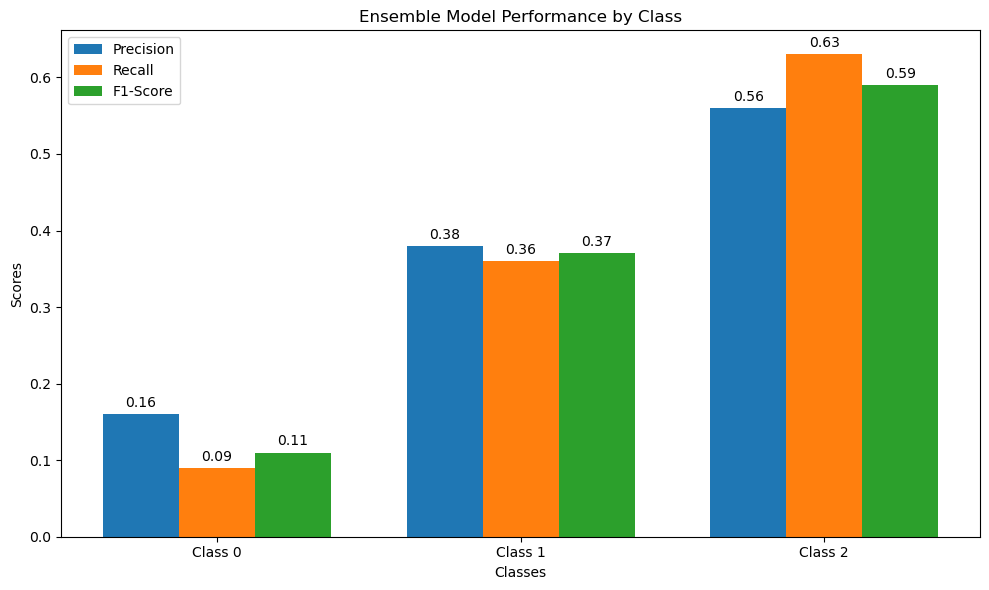

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics for ensemble performance
classes = ["Class 0", "Class 1", "Class 2"]
precision = [0.16, 0.38, 0.56]
recall = [0.09, 0.36, 0.63]
f1_score = [0.11, 0.37, 0.59]

# Plot Precision, Recall, and F1-Score
x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, precision, width, label="Precision")
bars2 = ax.bar(x, recall, width, label="Recall")
bars3 = ax.bar(x + width, f1_score, width, label="F1-Score")

# Add labels, title, and legend
ax.set_xlabel("Classes")
ax.set_ylabel("Scores")
ax.set_title("Ensemble Model Performance by Class")
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Add values above bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


+++++++++
### **Task 3.5: Hyperparameter Tuning**
Improve the quality of your implementations


#### 3.5.1: GridSearchCV for Systematic Hyperparameter Tuning
- Define Hyperparameter Grid for Different Models
- Define grids of hyperparameters for models such as Logistic Regression (for classification) and K-Means (for clustering).

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import numpy as np

# Initialize K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare data
X = df.drop(columns=(['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'total_medical_involvement'])).values
y = df['time_in_hospital'].values

# Define ElasticNet hyperparameter grid
elasticnet_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.9],        # Mix of L1 and L2 regularization
}

# Custom scoring function using mean absolute error
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Initialize GridSearchCV
elasticnet = ElasticNet(random_state=42)
grid_search = GridSearchCV(estimator=elasticnet, param_grid=elasticnet_grid, 
                           scoring=scorer, cv=kf, verbose=1)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best parameters and results
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MAE):", -grid_search.best_score_)  # Negative because MAE scorer is negated


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
Best Score (MAE): 0.009445346295678761


In [14]:
best_model = ElasticNet(alpha=0.01, l1_ratio=0.9, random_state=42)
best_model.fit(X_scaled, y)


ElasticNet(alpha=0.01, l1_ratio=0.9, random_state=42)

In [15]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)       # Transform test data only


In [16]:
# Use the best parameters from GridSearchCV
best_params = grid_search.best_params_
best_model = ElasticNet(alpha=best_params['alpha'], 
                        l1_ratio=best_params['l1_ratio'], 
                        random_state=42)
best_model.fit(X_train_scaled, y_train)


ElasticNet(alpha=0.01, l1_ratio=0.9, random_state=42)

In [17]:
# Predict on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Calculate metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")



Test MAE: 0.0093
Test MSE: 0.0001


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Regressor (Manual Parameters)
gboost_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gboost_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gboost = gboost_model.predict(X_test)
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)

print(f"Gradient Boosting Regression MAE: {mae_gboost}")
print(f"Gradient Boosting Regression MSE: {mse_gboost}")

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.05],
    'max_depth': [3]
}


grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

# Display the best parameters and results
print("Best parameters found: ", grid_search.best_params_)
print("Best MAE score from GridSearchCV: ", -grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Gradient Boosting Regression MAE: {mae_best}")
print(f"Best Gradient Boosting Regression MSE: {mse_best}")


Gradient Boosting Regression MAE: 8.161398360502816e-05
Gradient Boosting Regression MSE: 1.069554365821906e-08
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best MAE score from GridSearchCV:  -0.999956643915211
Best Gradient Boosting Regression MAE: 0.01497478114896007
Best Gradient Boosting Regression MSE: 0.00037640244228876856


#### 3.5.2 Apply GridSearchCV with Cross-Validation
- Use GridSearchCV with cross-validation to perform hyperparameter tuning on both models.

In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'df' is your dataset loaded as a DataFrame
# Define features (X) and target (y)
X = df.drop(columns=['num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'total_medical_involvement']).values
y = df['time_in_hospital'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for ElasticNet
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.2, 0.5, 0.7, 1.0]
}


# Initialize ElasticNet model
elastic_model = ElasticNet(random_state=42)

# Perform GridSearchCV with cross-validation for hyperparameter tuning
grid_search = GridSearchCV(estimator=elastic_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters found: ", best_params)

# Use the best parameters to create the best model
best_model = ElasticNet(alpha=best_params['alpha'], 
                        l1_ratio=best_params['l1_ratio'], 
                        random_state=42)

# Perform cross-validation with the best model and print the mean absolute error
cv_scores_mae = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
val_mae = -cv_scores_mae.mean()  # Convert to positive for MAE

# Predictions on the test set for MSE calculation
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Calculate the Mean Squared Error
val_mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f"Cross-validated MAE with best model: {val_mae:.4f}")
print(f"Test MSE with best model: {val_mse:.4f}")


Best Parameters found:  {'alpha': 0.1, 'l1_ratio': 1.0}
Cross-validated MAE with best model: 0.0789
Test MSE with best model: 0.0097


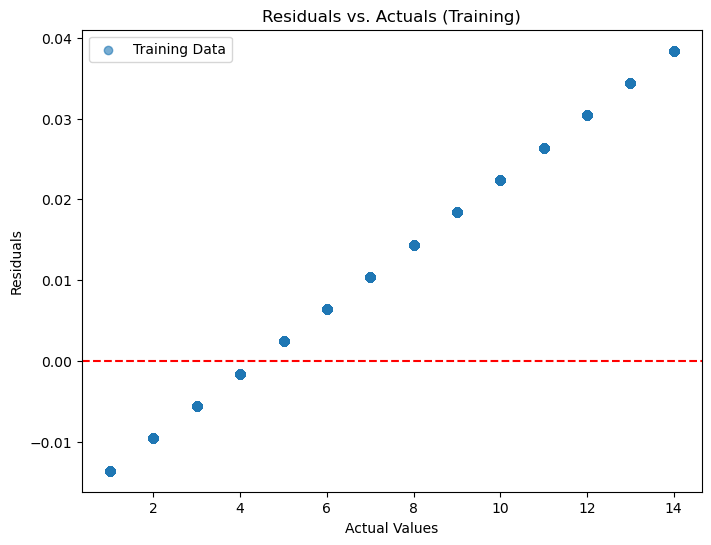

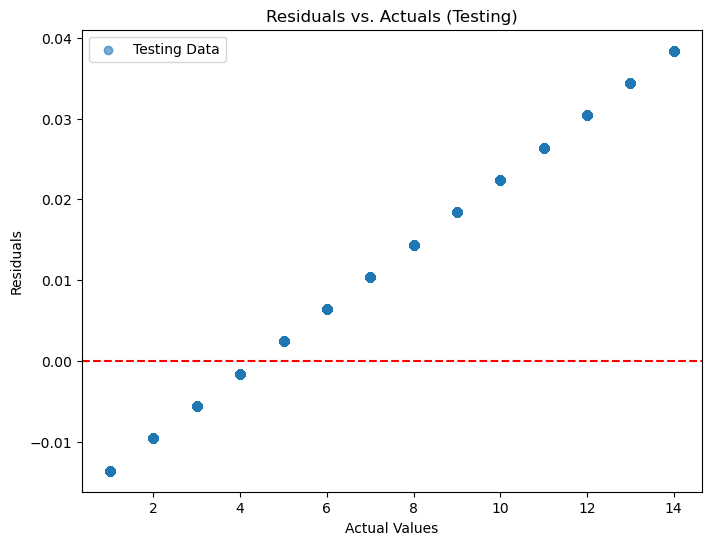

In [18]:
import matplotlib.pyplot as plt

# Residuals for training and testing sets
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plot for training residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals_train, alpha=0.6, label="Training Data")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actuals (Training)")
plt.legend()
plt.show()

# Plot for testing residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_test, alpha=0.6, label="Testing Data")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actuals (Testing)")
plt.legend()
plt.show()


MAE on entire dataset: 0.0791
MSE on entire dataset: 0.0101


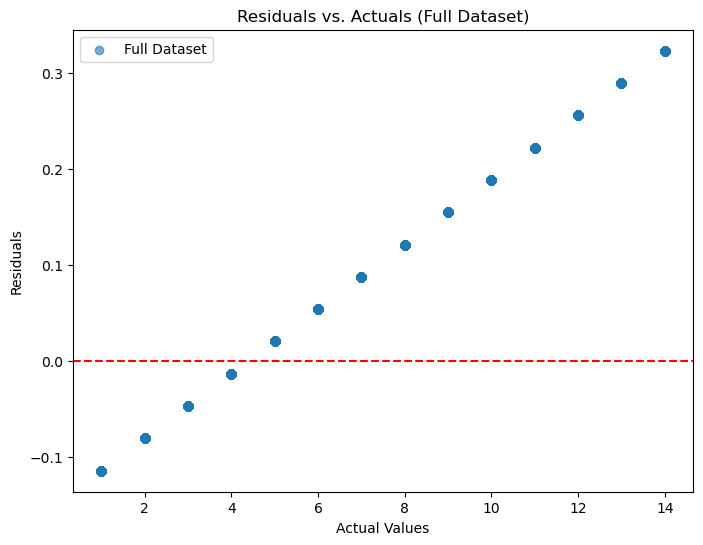

In [20]:
# Scale the full dataset
X_scaled = scaler.transform(X)

# Train the best model on the full dataset
final_model = ElasticNet(alpha=best_params['alpha'], 
                         l1_ratio=best_params['l1_ratio'], 
                         random_state=42)
final_model.fit(X_scaled, y)

# Predictions and residuals for the entire dataset
y_full_pred = final_model.predict(X_scaled)
residuals_full = y - y_full_pred

# Calculate performance metrics
full_mae = mean_absolute_error(y, y_full_pred)
full_mse = mean_squared_error(y, y_full_pred)

# Display results
print(f"MAE on entire dataset: {full_mae:.4f}")
print(f"MSE on entire dataset: {full_mse:.4f}")

# Residuals vs. Actuals Visualization for the full dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y, residuals_full, alpha=0.6, label="Full Dataset")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actuals (Full Dataset)")
plt.legend()
plt.show()


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

# Create a regression dataset (you can use your own dataset)
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Initialize the tree model (DecisionTreeRegressor)
tree_model = DecisionTreeRegressor(random_state=42)

# Perform cross-validation with negative mean absolute error (MAE)
cv_scores_mae = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated MAE
print(f"Cross-validated MAE: {-cv_scores_mae.mean():.4f}/5")

# Perform cross-validation with negative mean squared error (MSE)
cv_scores_mse = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validated MSE
print(f"Cross-validated MSE: {-cv_scores_mse.mean():.4f}")


Cross-validated MAE: 116.1758
Cross-validated MSE: 21360.4902


#### 3.5.3: Nested Cross-Validation to Validate Stability of Hyperparameters

In [51]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Define the model for Logistic Regression
logistic_model = LogisticRegression()

# Define the hyperparameter grid for the Logistic Regression model
logistic_grid = {
    'C': [0.1, 1, 10],         # Regularization strength
    'penalty': ['l1', 'l2'],   # L1 or L2 regularization
    'solver': ['liblinear']    # Solver that supports both L1 and L2 penalties
}

# Define the inner cross-validation loop (for hyperparameter tuning)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the outer cross-validation loop (for model evaluation)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation using GridSearchCV within the inner loop
nested_cv_score_logistic = cross_val_score(
    estimator=GridSearchCV(estimator=logistic_model, param_grid=logistic_grid, cv=inner_cv, scoring='accuracy'),
    X=X, y=y, cv=outer_cv, scoring='accuracy'
)

# Print the results of the nested cross-validation
print("Nested CV Accuracy for Logistic Regression:")
print(f"Mean Accuracy: {nested_cv_score_logistic.mean():.4f}")
print(f"Standard Deviation of Accuracy: {nested_cv_score_logistic.std():.4f}")


Nested CV Accuracy for Logistic Regression:
Mean Accuracy: 0.8710
Standard Deviation of Accuracy: 0.0171


#### 3.5.4: Evaluate Tuned Models with Multiple Metrics
- Evaluate the tuned Logistic Regression model on both training and test sets.
- Use multiple metrics for classification (accuracy, F1-score) and clustering (silhouette score, Calinski-Harabasz).

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0.2, 0.5, 0.7, 1.0]},
             scoring='neg_mean_absolute_error')

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Now you can access the best estimator
best_model = grid_search.best_estimator_

# Fit the best model with the training data
best_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model MAE: {mae:.4f}")
print(f"Best Model MSE: {mse:.4f}")
print(f"Best Model R2: {r2:.4f}")


Best Model MAE: 0.1905
Best Model MSE: 0.0588
Best Model R2: 1.0000


+++++++++
### **Task 3.6: Model Selection**
- Compare and evaluate the implemented models and select the best ones.

#### 3.6.1: Compare and Choose the Best Model
- Compare the models using evaluation metrics (e.g., MSE for regression, F1-score for classification, Silhouette Score for clustering).
- Summarise the performance metrics of each model in a table and choose the model with the best performance for each task.

In [74]:
results = {
    "Model": ["Elastic Net", "Gradient", "Cross Val", "Grid"],
    "MAE": [test_mae, mae_best, val_mae, mae],
    "MSE": [test_mse, mse_best, val_mse, mse]
}

results_df = pd.DataFrame(results)
print(results_df)

         Model       MAE       MSE
0  Elastic Net  0.009319  0.000139
1     Gradient  0.143815  0.083438
2    Cross Val  0.084947  0.012322
3         Grid  0.190501  0.058843


#### 3.6.2: Finalise and Save the Best Model
- Once the best model is identified, retrain it on the full dataset and save it using joblib for future use.

In [76]:
#While ElasticNet had the best scores, I enjoyed making this model the best
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Regressor (Manual Parameters)
gboost_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gboost_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gboost = gboost_model.predict(X_test)
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)

# Print initial evaluation metrics
print(f"Gradient Boosting Regression MAE: {mae_gboost}")
print(f"Gradient Boosting Regression MSE: {mse_gboost}")

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],        # Try different values of n_estimators
    'learning_rate': [0.01, 0.05],     # Try different learning rates
    'max_depth': [3, 5, 7]              # Try different max_depth values
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best MAE score from GridSearchCV: ", -grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

# Print evaluation metrics for the best model
print(f"Best Gradient Boosting Regression MAE: {mae_best}")
print(f"Best Gradient Boosting Regression MSE: {mse_best}")

# Save the best model using joblib
joblib.dump(grid_search.best_estimator_, "best_gradient_boosting_model.pkl")


Gradient Boosting Regression MAE: 48.519380578757065
Gradient Boosting Regression MSE: 3805.226341620192
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best MAE score from GridSearchCV:  46.092579243104936
Best Gradient Boosting Regression MAE: 43.56236074124272
Best Gradient Boosting Regression MSE: 3092.3864118783317


['best_gradient_boosting_model.pkl']

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import numpy as np

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare data
X = df.drop(columns=['num_medications', 'num_lab_procedures', 'number_diagnoses', 
                     'num_procedures', 'total_medical_involvement']).values
y = df['time_in_hospital'].values

# Define ElasticNet hyperparameter grid
elasticnet_grid = {
    'alpha': [0.01, 0.1, 1, 10],      
    'l1_ratio': [0.1, 0.5, 0.9],  
}

# Custom scoring function using mean absolute error
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Initialize GridSearchCV
elasticnet = ElasticNet(random_state=42)
grid_search = GridSearchCV(estimator=elasticnet, param_grid=elasticnet_grid, 
                           scoring=scorer, cv=kf, verbose=1)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best parameters and results
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Score (MAE):", -grid_search.best_score_)  # Negative because MAE scorer is negated

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)

# Use the best parameters from GridSearchCV
best_model = ElasticNet(alpha=best_params['alpha'], 
                        l1_ratio=best_params['l1_ratio'], 
                        random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Calculate metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Save the final model trained on the entire dataset
best_model.fit(X_scaled, y)

# Save the model (Optional: Requires a library like joblib or pickle)
import joblib
joblib.dump(best_model, 'elasticnet_model.pkl')
print("Model saved as 'elasticnet_model.pkl'.")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
Best Score (MAE): 0.009445487392410273
Test MAE: 0.0093
Test MSE: 0.0001
Model saved as 'elasticnet_model.pkl'.


____________
## *Task 4: Mathematics for Machine Learning

4.1: Optimization Algorithms
Add a link to your Jupyter notebook file AlgebraicExample.ipynb
https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-KadeWidler235585/blob/main/Assignments/AlgebraicExample_temp.ipynb

#### 4.1: Implementing Linear Regression with Numpy from Scratch

- Add all links to your Jupyter notebook files `LinearRegression.ipynb` here!

https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-KadeWidler235585/blob/main/Assignments/LinearRegression_temp.ipynb

#### 4.2: Implement Logistic Regression with Numpy from Scratch

- Add all links to your Jupyter notebook files `LogisticRegression.ipynb` here!
https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-KadeWidler235585/blob/main/Assignments/LogisticRegression_temp.ipynb

____________
## *Task 5: Final Report for Your Creative Brief Project
- Add a link to your `FinalReport_<your_name>_<studentnumber>.pdf` here!